<a href="https://colab.research.google.com/github/dbenev-com-br/mvp_analise_exploratoria_2024-09/blob/main/MVP_DanielBenevides_AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

## 0. Objetivo

Avaliar a correlação entre pressão alta, sedentarismo, horas de sono, taxas de colesterol, circunferência abdominal e peso.

Imagina-se que indivíduos pouco ativos, tenham maior peso e circunferência abdominal, durmam menos e tenham taxas de colesterol mais elevadas e também pressão arterial elevada.



## 1. Fontes de Dados

Todos os datasets foram importados das Bases de Dados da Pesquisa Nacional de Saúde e Nutrição Contínua (Mexico, 2023), ou em seu idioma original:

"Bases de datos y cuestionarios para Encuesta Nacional de Salud y Nutrición Continua 2023".

https://ensanut.insp.mx/encuestas/ensanutcontinua2023/descargas.php

Os datasets utilizados foram os seguintes:

1. Atividade Física de Adolescentes e Adultos (idade de 15 anos ou mais)
2. Exames de Sangue
3. Antropometria e Pressão Arterial

Cada dataset se refere a um questionário da pesquisa.
Cada dataset também possui um dicionário de dados (catálogo).
Esses dicionários de dados foram revisados, ganhando uma revisão com a inclusão de um mapeamento para novos nomes de atributos, tendo em vista que o original se utiliza de uma nomenclatura de campos codificada, inadequada para esta análise.

Estes documentos complementares aos datasets são fundamentais para o entendimento dos seus atributos e também explicam a lógica de preenchimento ou não preenchimento de determinados campos de acordo com faixa etária e sexo do entrevistado/examinado.

Assim, temos:

1. Atividade Física de Adolescentes e Adultos (idade de 15 anos ou mais)

    [Dataset](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/actividad_fisica_w_adultos.csv)

    [Dicionário de Dados Original](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/dicionarios_dados/actividad_fisica_w_adultos.Catalogo_original.xlsx)

    [Dicionário de Dados Revisado](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/dicionarios_dados/actividad_fisica_w_adultos.Catalogo_revisado.xlsx)

    [Questionário](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/questionarios/Cuestionario_AF_AdultosENSANUT2023.Cuestionarios.pdf)


2. Exames de Sangue

    [Dataset](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/actividad_fisica_w_adultos.csv)

    [Dicionário de Dados Original](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/dicionarios_dados/tomas_de_sangre_w8.Catalogo_original.xlsx)

    [Dicionário de Dados Revisado](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/dicionarios_dados/tomas_de_sangre_w8.Catalogo_revisado.xlsx)

    [Questionário](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/questionarios/Formato_Muestras_SangreENSANUT2023mayo_sinhigado_graso.Cuestionarios.pdf)


3. Antropometria e Pressão Arterial

    [Dataset](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/antropometria_HTA_4mar24.csv)

    [Dicionário de Dados Original](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/dicionarios_dados/Antropometria_HTA_4mar24.Catalogo_original.xlsx)

    [Dicionário de Dados Revisado](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/dicionarios_dados/Antropometria_HTA_4mar24.Catalogo_revisado.xlsx)

    [Questionário](https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/questionarios/Cuestionario_Antro_TensionENSANUT202308MAY23.Cuestionarios.pdf)


Analisando os dicionários de dados, nota-se que eles têm muitas colunas, grande parte desnecessária para a análise desejada.

Essas colunas serão removidas dos datasets e, em seguida, será realizada uma análise dos missings nas colunas restantes.

Havendo colunas 100% nulas elas serão removidas.

O próximo passo será fazer um merge entre as 3 fontes de dados, gerando um novo dataset para ser analisado.

https://www.kaggle.com/datasets/frederickfelix/hipertensin-arterial-mxico?resource=download

## 2. Pré-Processamento de Dados

In [349]:
## Importação de Pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## Desabilitar Warnings
import warnings
warnings.filterwarnings("ignore")

## Formatação de Tabelas
from google.colab.data_table import DataTable
DataTable.max_columns = 300

from google.colab import data_table
data_table.enable_dataframe_formatter()

## Formatação de Prints usando Markdown
from IPython.display import Markdown as md

## Mostrar todas as colunas nas tabelas impressas no colab
pd.set_option('display.max_columns', None)

## Mostrar todas as linhas nas tabelas impressas no colab
pd.set_option('display.max_rows', None)


## 2.1 Dataset Atividade Fisica de Adolescentes e Adultos (15 anos ou mais)


### 2.1.1 Carga do Dataset

In [350]:
# URL do Dataset
url = "https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/actividad_fisica_w_adultos.csv"

# Lê o arquivo do Dataset, dando skipinitialspace nos campos para transformar
# strings vazias em NaNs
dsAtivFisica = pd.read_csv(url, delimiter=';', encoding='utf-8-sig', skipinitialspace=True)

# Renomeando colunas para torná-las mais inteligíveis (vide arquivo )
dsAtivFisica.columns = ['id','id_base','maquina','hora_ini_1','data_ini_1','hora_fim_1','data_fim_1','duracao_entrevista_1','resultado_entrevista_1','hora_ini_2','data_ini_2','hora_fim_2','data_fim_2','duracao_entrevista_2','resultado_entrevista_2','hora_ini_3','data_ini_3','hora_fim_3','data_fim_3','duracao_entrevista_3','resultado_entrevista_3','hora_ini_4','data_ini_4','hora_fim_4','data_fim_4','duracao_entrevista_4','resultado_entrevista_4','hora_ini_entrevista','data_ini_entrevista','entidade','desc_ent','municipio','desc_mun','nota1_consentimento_entrevista','sexo','idade','data_nasc','nota_instrucoes','hora_dormir_dia_util','hora_dormir_fim_semana','hora_levantar_dia_util','hora_levantar_fim_semana','horas_tela_tv_dia_util','horas_tela_tv_fim_semana','horas_tela_videogame_dia_util','horas_tela_videogame_fim_semana','horas_tela_internet_dia_util','horas_tela_internet_fim_semana','incapacidade_fisica','tempo_transporte_escola','meio_transporte_maior_trecho_escola','meio_transporte_maior_trecho_escola_especificar','qtd_atividades_fisicas_diferentes_12meses','atividades_fisicas_realizadas_12meses_A','atividades_fisicas_realizadas_12meses_B','atividades_fisicas_realizadas_12meses_C','atividades_fisicas_realizadas_12meses_D','atividades_fisicas_realizadas_12meses_E1','atividades_fisicas_realizadas_12meses_F','atividades_fisicas_realizadas_12meses_G','atividades_fisicas_realizadas_12meses_H','atividades_fisicas_realizadas_12meses_I','atividades_fisicas_realizadas_12meses_J','atividades_fisicas_realizadas_12meses_K','atividades_fisicas_realizadas_12meses_L','atividades_fisicas_realizadas_12meses_M','atividades_fisicas_realizadas_12meses_N','atividades_fisicas_realizadas_12meses_O','atividades_fisicas_realizadas_12meses_P','atividades_fisicas_realizadas_12meses_Q','atividades_fisicas_realizadas_12meses_R','atividades_fisicas_realizadas_12meses_S','atividades_fisicas_realizadas_12meses_T','atividades_fisicas_realizadas_12meses_E','nota2_atividade_fisica','qtd_dias_ativo_7dias','qtd_dias_ativo_7dias_60min','nota3_instrucoes','qtd_horas_media_sono','nota4_esforco_fisico_intenso','qtd_dias_esforco_fisico_intenso_7dias','qtd_tempo_esforco_fisico_intenso_1dia_qtdHora','qtd_tempo_esforco_fisico_intenso_1dia_qtdMin','qtd_tempo_esforco_fisico_intenso_7dias_qtdHora','qtd_tempo_esforco_fisico_intenso_7dias_qtdMin','nota5_esforco_fisico_moderado','qtd_dias_esforco_fisico_moderado_7dias','qtd_tempo_esforco_fisico_moderado_1dia_qtdHora','qtd_tempo_esforco_fisico_moderado_1dia_qtdMin','qtd_tempo_esforco_fisico_moderado_7dias_qtdHora','qtd_tempo_esforco_fisico_moderado_7dias_qtdMin','nota6_caminhada','qtd_dias_caminhada_continua_10min_7dias','qtd_tempo_caminhada_continua_1dia_qtdHora','qtd_tempo_caminhada_continua_1dia_qtdMin','qtd_tempo_caminhada_continua_7dias_qtdHora','qtd_tempo_caminhada_continua_7dias_qtdMin','nota7_sentado','qtd_tempo_sentado_1dia_qtdHora','qtd_tempo_sentado_1dia_qtdMin','qtd_tempo_sentado_quartafeira_qtdHora','qtd_tempo_sentado_quartafeira_qtdMin','nota8_transporte','qtd_dias_transporte_veiculo_automotor_7dias','qtd_tempo_transporte_veiculo_automotor_1dia_qtdHoras','qtd_tempo_transporte_veiculo_automotor_1dia_qtdMin','nota9_atividade_sedentaria','qtd_horas_tela_tv_por_dia_dia_util','qtd_horas_tela_tv_por_dia_fim_semana','qtd_horas_tela_videogame_por_dia_dia_util','qtd_horas_tela_videogame_por_dia_fim_semana','qtd_horas_tela_internet_por_dia_dia_util','qtd_horas_tela_internet_por_dia_fim_semana','atividade_fisica_semana_passada_igual_3meses','comentario','duracao_entrevista','hora_fim_entrevista','data_fim_entrevista','entrevista_completa','outro_resultado_entrevista','ponderador','extrato_urbano_rural','ext_sel','upm','regiao']

# Exibir Qtde de Linhas do Dataset
qtdLinhasDataset = dsAtivFisica.shape[0]
md(f'####{qtdLinhasDataset=}')


####qtdLinhasDataset=3977

In [351]:
# Detalha a estrutura do dataset, mostrando suas colunas, com suas respectivas quantidades de valores nulos e não nulos e tipos de dados.
pd.DataFrame({"coluna": dsAtivFisica.columns, "qtdNotNull": len(dsAtivFisica)-dsAtivFisica.isnull().sum().values, "qtdNull": dsAtivFisica.isnull().sum().values, "tipoDado": dsAtivFisica.dtypes.values})

,coluna,qtdNotNull,qtdNull,tipoDado
0,id,3977,0,object
1,id_base,3977,0,object
2,maquina,3977,0,object
3,hora_ini_1,3977,0,object
4,data_ini_1,3977,0,object
5,hora_fim_1,3977,0,object
6,data_fim_1,3977,0,object
7,duracao_entrevista_1,3977,0,int64
8,resultado_entrevista_1,3977,0,int64
9,hora_ini_2,146,3831,object


In [352]:
# Exibir Primeiras Linhas do Dataset
dsAtivFisica.head(10)

,id,id_base,maquina,hora_ini_1,data_ini_1,hora_fim_1,data_fim_1,duracao_entrevista_1,resultado_entrevista_1,hora_ini_2,data_ini_2,hora_fim_2,data_fim_2,duracao_entrevista_2,resultado_entrevista_2,hora_ini_3,data_ini_3,hora_fim_3,data_fim_3,duracao_entrevista_3,resultado_entrevista_3,hora_ini_4,data_ini_4,hora_fim_4,data_fim_4,duracao_entrevista_4,resultado_entrevista_4,hora_ini_entrevista,data_ini_entrevista,entidade,desc_ent,municipio,desc_mun,nota1_consentimento_entrevista,sexo,idade,data_nasc,nota_instrucoes,hora_dormir_dia_util,hora_dormir_fim_semana,hora_levantar_dia_util,hora_levantar_fim_semana,horas_tela_tv_dia_util,horas_tela_tv_fim_semana,horas_tela_videogame_dia_util,horas_tela_videogame_fim_semana,horas_tela_internet_dia_util,horas_tela_internet_fim_semana,incapacidade_fisica,tempo_transporte_escola,meio_transporte_maior_trecho_escola,meio_transporte_maior_trecho_escola_especificar,qtd_atividades_fisicas_diferentes_12meses,atividades_fisicas_realizadas_12meses_A,atividades_fisicas_realizadas_12meses_B,atividades_fisicas_realizadas_12meses_C,atividades_fisicas_realizadas_12meses_D,atividades_fisicas_realizadas_12meses_E1,atividades_fisicas_realizadas_12meses_F,atividades_fisicas_realizadas_12meses_G,atividades_fisicas_realizadas_12meses_H,atividades_fisicas_realizadas_12meses_I,atividades_fisicas_realizadas_12meses_J,atividades_fisicas_realizadas_12meses_K,atividades_fisicas_realizadas_12meses_L,atividades_fisicas_realizadas_12meses_M,atividades_fisicas_realizadas_12meses_N,atividades_fisicas_realizadas_12meses_O,atividades_fisicas_realizadas_12meses_P,atividades_fisicas_realizadas_12meses_Q,atividades_fisicas_realizadas_12meses_R,atividades_fisicas_realizadas_12meses_S,atividades_fisicas_realizadas_12meses_T,atividades_fisicas_realizadas_12meses_E,nota2_atividade_fisica,qtd_dias_ativo_7dias,qtd_dias_ativo_7dias_60min,nota3_instrucoes,qtd_horas_media_sono,nota4_esforco_fisico_intenso,qtd_dias_esforco_fisico_intenso_7dias,qtd_tempo_esforco_fisico_intenso_1dia_qtdHora,qtd_tempo_esforco_fisico_intenso_1dia_qtdMin,qtd_tempo_esforco_fisico_intenso_7dias_qtdHora,qtd_tempo_esforco_fisico_intenso_7dias_qtdMin,nota5_esforco_fisico_moderado,qtd_dias_esforco_fisico_moderado_7dias,qtd_tempo_esforco_fisico_moderado_1dia_qtdHora,qtd_tempo_esforco_fisico_moderado_1dia_qtdMin,qtd_tempo_esforco_fisico_moderado_7dias_qtdHora,qtd_tempo_esforco_fisico_moderado_7dias_qtdMin,nota6_caminhada,qtd_dias_caminhada_continua_10min_7dias,qtd_tempo_caminhada_continua_1dia_qtdHora,qtd_tempo_caminhada_continua_1dia_qtdMin,qtd_tempo_caminhada_continua_7dias_qtdHora,qtd_tempo_caminhada_continua_7dias_qtdMin,nota7_sentado,qtd_tempo_sentado_1dia_qtdHora,qtd_tempo_sentado_1dia_qtdMin,qtd_tempo_sentado_quartafeira_qtdHora,qtd_tempo_sentado_quartafeira_qtdMin,nota8_transporte,qtd_dias_transporte_veiculo_automotor_7dias,qtd_tempo_transporte_veiculo_automotor_1dia_qtdHoras,qtd_tempo_transporte_veiculo_automotor_1dia_qtdMin,nota9_atividade_sedentaria,qtd_horas_tela_tv_por_dia_dia_util,qtd_horas_tela_tv_por_dia_fim_semana,qtd_horas_tela_videogame_por_dia_dia_util,qtd_horas_tela_videogame_por_dia_fim_semana,qtd_horas_tela_internet_por_dia_dia_util,qtd_horas_tela_internet_por_dia_fim_semana,atividade_fisica_semana_passada_igual_3meses,comentario,duracao_entrevista,hora_fim_entrevista,data_fim_entrevista,entrevista_completa,outro_resultado_entrevista,ponderador,extrato_urbano_rural,ext_sel,upm,regiao
0,2023_01001001_01,2023_01001001,MQ650,20:01:57,04/12/2023,20:05:32,04/12/2023,4,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,20:01:57,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,1,47,26041976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,7.0,9.0,0.0,NaN,NaN,1.0,4.0,0.0,NaN,NaN,1.0,4.0,0.0,30.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,2.0,NaN,4,20:05:32,04/12/2023,1,NaN,"21300,7807393647",

### 2.1.2 Análise e Tratamento de Missings

In [353]:
# Verificando nulls no dataset
camposMissing = dsAtivFisica.isnull().sum()

# Imprime os campos com suas respectivas quantidades de linhas com valor Missing
pd.DataFrame({'campo':camposMissing.index, 'qtdNull':camposMissing.values})

,campo,qtdNull
0,id,0
1,id_base,0
2,maquina,0
3,hora_ini_1,0
4,data_ini_1,0
5,hora_fim_1,0
6,data_fim_1,0
7,duracao_entrevista_1,0
8,resultado_entrevista_1,0
9,hora_ini_2,3831


### 2.1.3 Drop dos campos 100% missing


In [354]:
# Será feito o descarte dos campos que estão missing em todas as linhas

# O dataset será copiado para uso nos proximos passos

# Recuperando os nomes das colunas
col = list(dsAtivFisica.columns)

# Novo dataset que irá inicialmente conter todas as colunas do dataset original
dsAtivFisicaFinal = dsAtivFisica[col[:]]

# Filtra os campos 100% missing para drop em seguida
camposTodosMissing = camposMissing[camposMissing == qtdLinhasDataset]
pd.DataFrame({'campo':camposTodosMissing.index, 'qtdNull':camposTodosMissing.values})

,campo,qtdNull
0,nota_instrucoes,3977
1,hora_dormir_dia_util,3977
2,hora_dormir_fim_semana,3977
3,hora_levantar_dia_util,3977
4,hora_levantar_fim_semana,3977
5,horas_tela_tv_dia_util,3977
6,horas_tela_tv_fim_semana,3977
7,horas_tela_videogame_dia_util,3977
8,horas_tela_videogame_fim_semana,3977
9,horas_tela_internet_dia_util,3977


In [355]:
# Drop dos campos 100% missing
qtdCamposDeletados = len(camposTodosMissing.index)

if (qtdCamposDeletados > 0):

  dsAtivFisicaFinal.drop(camposTodosMissing.index, axis=1, inplace=True)

print(f'{qtdCamposDeletados=}')

# dsAtivFisicaFinal.head(10)

# Detalha a estrutura do dataset, mostrando suas colunas, com suas respectivas quantidades de valores nulos e não nulos e tipos de dados.
pd.DataFrame({"coluna": dsAtivFisicaFinal.columns, "qtdNotNull": len(dsAtivFisicaFinal)-dsAtivFisicaFinal.isnull().sum().values, "qtdNull": dsAtivFisicaFinal.isnull().sum().values, "tipoDado": dsAtivFisicaFinal.dtypes.values})

qtdCamposDeletados=41


,coluna,qtdNotNull,qtdNull,tipoDado
0,id,3977,0,object
1,id_base,3977,0,object
2,maquina,3977,0,object
3,hora_ini_1,3977,0,object
4,data_ini_1,3977,0,object
5,hora_fim_1,3977,0,object
6,data_fim_1,3977,0,object
7,duracao_entrevista_1,3977,0,int64
8,resultado_entrevista_1,3977,0,int64
9,hora_ini_2,146,3831,object


### 2.1.4 Remoção dos campos inúteis para o projeto

In [356]:
# Remove as colunas que não interessam ao proposito do projeto (Ids não
# usados, datas e horas de inicio e fim das entrevistas, duração das
# entrevistas, notas diversas)
dsAtivFisicaFinal.drop(['id_base','maquina','hora_ini_1','data_ini_1','hora_fim_1','data_fim_1','duracao_entrevista_1','resultado_entrevista_1','hora_ini_2','data_ini_2','hora_fim_2','data_fim_2','duracao_entrevista_2','resultado_entrevista_2','hora_ini_3','data_ini_3','hora_fim_3','data_fim_3','duracao_entrevista_3','resultado_entrevista_3','hora_ini_4','data_ini_4','hora_fim_4','data_fim_4','duracao_entrevista_4','resultado_entrevista_4','nota1_consentimento_entrevista','nota3_instrucoes','nota4_esforco_fisico_intenso','nota5_esforco_fisico_moderado','nota6_caminhada','nota7_sentado','nota8_transporte','atividade_fisica_semana_passada_igual_3meses','nota9_atividade_sedentaria','comentario', 'duracao_entrevista','entrevista_completa','ext_sel','upm','ponderador'], axis=1, inplace= True)



In [357]:
# Mostra o dataset sem as colunas inúteis
dsAtivFisicaFinal.head(10)

,id,hora_ini_entrevista,data_ini_entrevista,entidade,desc_ent,municipio,desc_mun,sexo,idade,data_nasc,qtd_horas_media_sono,qtd_dias_esforco_fisico_intenso_7dias,qtd_tempo_esforco_fisico_intenso_1dia_qtdHora,qtd_tempo_esforco_fisico_intenso_1dia_qtdMin,qtd_tempo_esforco_fisico_intenso_7dias_qtdHora,qtd_tempo_esforco_fisico_intenso_7dias_qtdMin,qtd_dias_esforco_fisico_moderado_7dias,qtd_tempo_esforco_fisico_moderado_1dia_qtdHora,qtd_tempo_esforco_fisico_moderado_1dia_qtdMin,qtd_tempo_esforco_fisico_moderado_7dias_qtdHora,qtd_tempo_esforco_fisico_moderado_7dias_qtdMin,qtd_dias_caminhada_continua_10min_7dias,qtd_tempo_caminhada_continua_1dia_qtdHora,qtd_tempo_caminhada_continua_1dia_qtdMin,qtd_tempo_caminhada_continua_7dias_qtdHora,qtd_tempo_caminhada_continua_7dias_qtdMin,qtd_tempo_sentado_1dia_qtdHora,qtd_tempo_sentado_1dia_qtdMin,qtd_tempo_sentado_quartafeira_qtdHora,qtd_tempo_sentado_quartafeira_qtdMin,qtd_dias_transporte_veiculo_automotor_7dias,qtd_tempo_transporte_veiculo_automotor_1dia_qtdHoras,qtd_tempo_transporte_veiculo_automotor_1dia_qtdMin,qtd_horas_tela_tv_por_dia_dia_util,qtd_horas_tela_tv_por_dia_fim_semana,qtd_horas_tela_videogame_por_dia_dia_util,qtd_horas_tela_videogame_por_dia_fim_semana,qtd_horas_tela_internet_por_dia_dia_util,qtd_horas_tela_internet_por_dia_fim_semana,hora_fim_entrevista,data_fim_entrevista,extrato_urbano_rural,regiao
0,2023_01001001_01,20:01:57,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,47,26041976,2,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.0,9.0,0.0,NaN,NaN,4.0,0.0,NaN,NaN,4.0,0.0,30.0,1.0,2.0,0.0,0.0,1.0,2.0,20:05:32,04/12/2023,3,1
1,2023_01001001_02,14:06:05,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,30071982,1,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.0,0.0,30.0,NaN,NaN,6.0,0.0,NaN,NaN,7.0,0.0,40.0,1.0,1.0,0.0,0.0,4.0,4.0,14:13:23,04/12/2023,3,1
2,2023_01001001_04,14:16:38,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,17,2112006,5,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.0,2.0,0.0,NaN,NaN,5.0,0.0,NaN,NaN,7.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,4.0,14:21:46,04/12/2023,3,1
3,2023_01001002_01,20:55:25,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,18031980,1,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.0,30.0,NaN,NaN,7.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,21:00:19,04/12/2023,3,1
4,2023_01001003_01,12:30:33,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,49,16071974,3,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.0,5.0,0.0,NaN,NaN,4.0,0.0,NaN,NaN,3.0,1.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,12:36:35,04/12/2023,3,1
5,2023_01001003_04,12:27:02,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,10052003,4,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,2.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,12:29:58,04/12/2023,3,1
6,2023_01001003_05,13:17:06,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,15,19022008,4,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.0,0.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,1.0,0.0,30.0,2.0,2.0,2.0,2.0,5.0,5.0,13:24:43,04/12/2023,3,1
7,2023_01001008_03,17:25:52,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,22012003,3,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.0,3.0,0.0,NaN,NaN,5.0,0.0,NaN,NaN,7.0,0.0,50.0,2.0,3.0,0.0,0.0,4.0,3.0,17:29:59,04/12/2023,3,1
8,2023_01001008_05,17:47:16,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,16,30042007,4,0,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,7.0,6.0,0.0,NaN,NaN,2.0,0.0,NaN,NaN,7.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,17:54:14,04/12/2023,3,1
9,2023_01001009_01,17:15:02,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,56,18051967,1,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,12.0,0.0,NaN,NaN,1.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,17:17:20,04/12/2023,3,1


### 2.1.5 Tratamento dos Nulls nos Campos de *Quantidade*

In [358]:
# Verificando novamente nulls no dataset
camposMissing=dsAtivFisicaFinal.isnull().sum()

# Imprime os campos do dataset com suas respectivas qtd de linhas Missing
pd.DataFrame({'campo':camposMissing.index, 'qtdNull':camposMissing.values})

,campo,qtdNull
0,id,0
1,hora_ini_entrevista,0
2,data_ini_entrevista,0
3,entidade,0
4,desc_ent,0
5,municipio,0
6,desc_mun,0
7,sexo,0
8,idade,0
9,data_nasc,0


<Axes: >

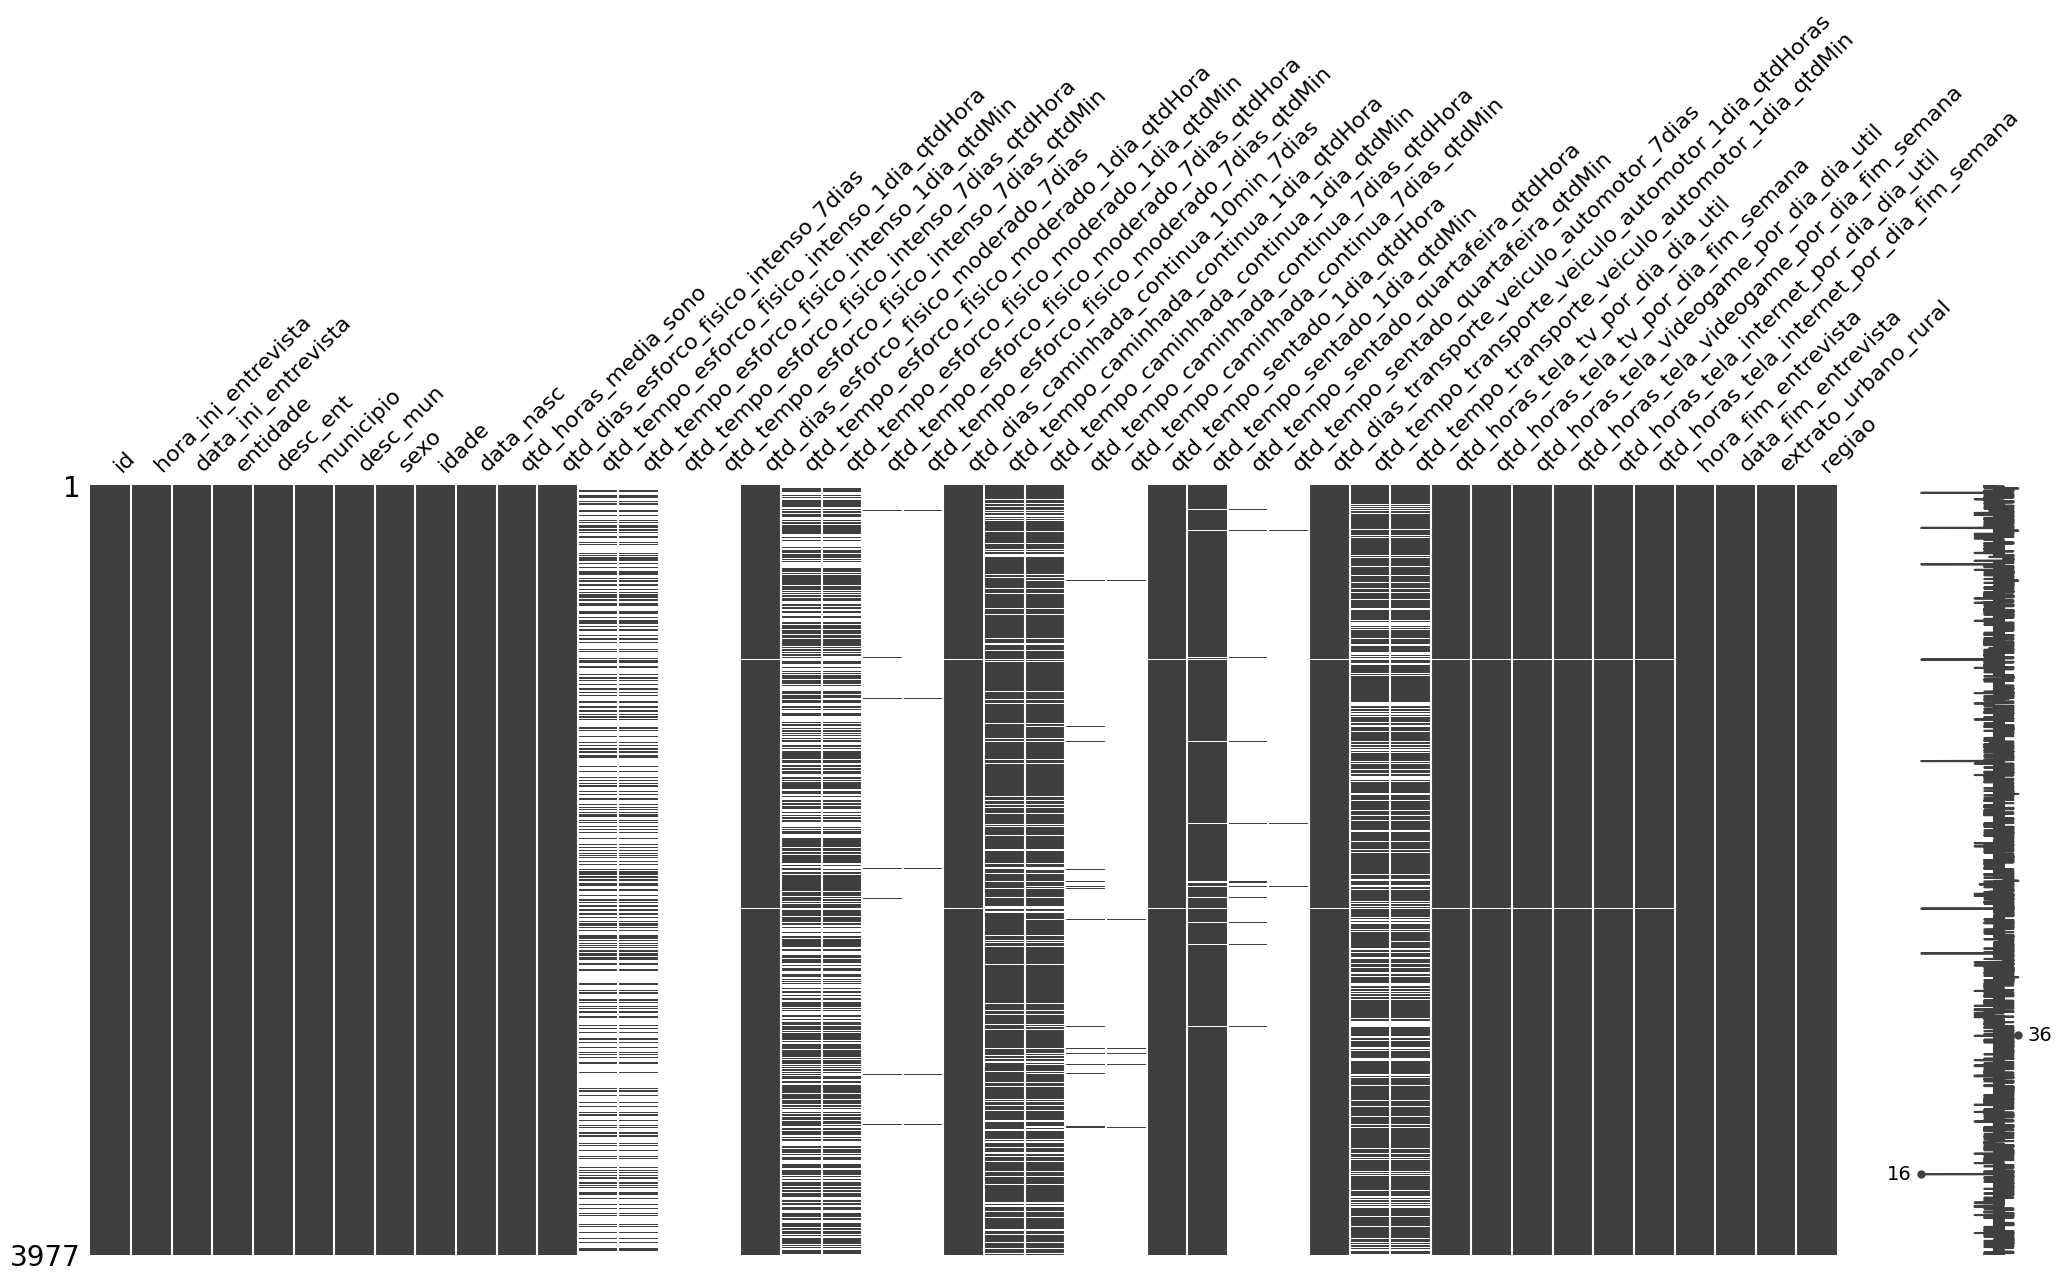

In [359]:
# Visualização matricial da nulidade do dataset (antes de resolver os missings)
ms.matrix(dsAtivFisicaFinal)

<Axes: >

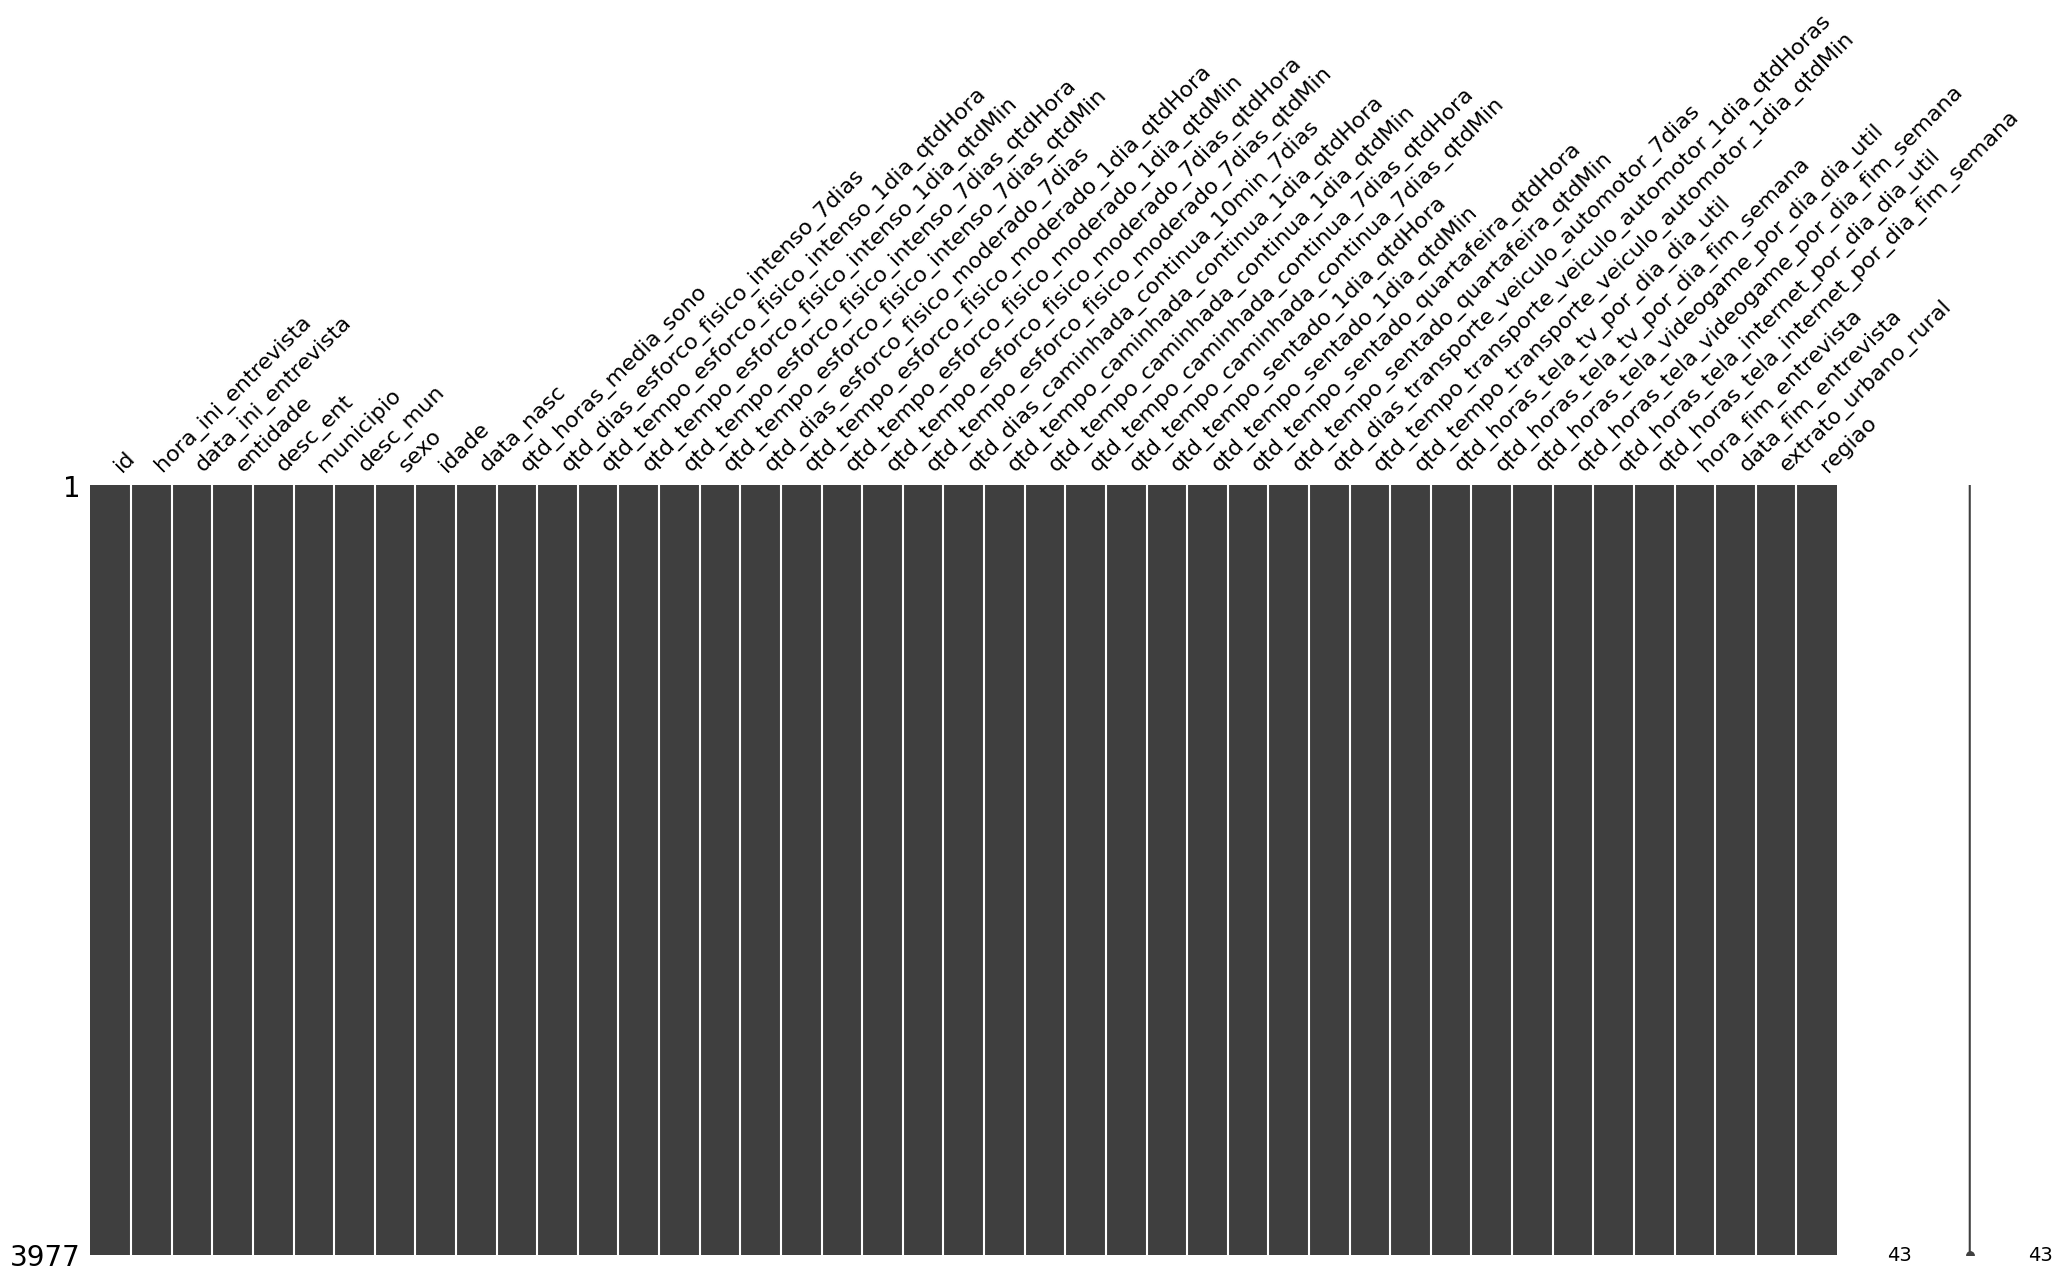

In [360]:
# Todas as colunas restantes que possuem valores missing devem ter seus valores
# NaN zerados, pois são campos de quantidades numéricas que participarão
# de cálculos nos passos seguintes

# Substituindo os NaN de todo o dataframe por 0
dsAtivFisicaFinal.fillna(0, inplace=True)

# Visualização matricial da nulidade do dataset (após resolver os missings)
ms.matrix(dsAtivFisicaFinal)

### 2.1.6 Dataset Final de Atividade Física

In [361]:
# Detalha a estrutura do dataset final, mostrando suas colunas, qtde de valores nulos e não nulos e tipo de dado.
pd.DataFrame({"coluna": dsAtivFisicaFinal.columns, "qtdNotNull": len(dsAtivFisicaFinal)-dsAtivFisicaFinal.isnull().sum().values, "qtdNull": dsAtivFisicaFinal.isnull().sum().values, "tipoDado": dsAtivFisicaFinal.dtypes.values})

,coluna,qtdNotNull,qtdNull,tipoDado
0,id,3977,0,object
1,hora_ini_entrevista,3977,0,object
2,data_ini_entrevista,3977,0,object
3,entidade,3977,0,int64
4,desc_ent,3977,0,object
5,municipio,3977,0,int64
6,desc_mun,3977,0,object
7,sexo,3977,0,int64
8,idade,3977,0,int64
9,data_nasc,3977,0,int64


In [362]:
# Dataset Final - Mostra linhas iniciais
dsAtivFisicaFinal.head(10)

,id,hora_ini_entrevista,data_ini_entrevista,entidade,desc_ent,municipio,desc_mun,sexo,idade,data_nasc,qtd_horas_media_sono,qtd_dias_esforco_fisico_intenso_7dias,qtd_tempo_esforco_fisico_intenso_1dia_qtdHora,qtd_tempo_esforco_fisico_intenso_1dia_qtdMin,qtd_tempo_esforco_fisico_intenso_7dias_qtdHora,qtd_tempo_esforco_fisico_intenso_7dias_qtdMin,qtd_dias_esforco_fisico_moderado_7dias,qtd_tempo_esforco_fisico_moderado_1dia_qtdHora,qtd_tempo_esforco_fisico_moderado_1dia_qtdMin,qtd_tempo_esforco_fisico_moderado_7dias_qtdHora,qtd_tempo_esforco_fisico_moderado_7dias_qtdMin,qtd_dias_caminhada_continua_10min_7dias,qtd_tempo_caminhada_continua_1dia_qtdHora,qtd_tempo_caminhada_continua_1dia_qtdMin,qtd_tempo_caminhada_continua_7dias_qtdHora,qtd_tempo_caminhada_continua_7dias_qtdMin,qtd_tempo_sentado_1dia_qtdHora,qtd_tempo_sentado_1dia_qtdMin,qtd_tempo_sentado_quartafeira_qtdHora,qtd_tempo_sentado_quartafeira_qtdMin,qtd_dias_transporte_veiculo_automotor_7dias,qtd_tempo_transporte_veiculo_automotor_1dia_qtdHoras,qtd_tempo_transporte_veiculo_automotor_1dia_qtdMin,qtd_horas_tela_tv_por_dia_dia_util,qtd_horas_tela_tv_por_dia_fim_semana,qtd_horas_tela_videogame_por_dia_dia_util,qtd_horas_tela_videogame_por_dia_fim_semana,qtd_horas_tela_internet_por_dia_dia_util,qtd_horas_tela_internet_por_dia_fim_semana,hora_fim_entrevista,data_fim_entrevista,extrato_urbano_rural,regiao
0,2023_01001001_01,20:01:57,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,47,26041976,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,2.0,0.0,0.0,1.0,2.0,20:05:32,04/12/2023,3,1
1,2023_01001001_02,14:06:05,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,30071982,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,30.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,40.0,1.0,1.0,0.0,0.0,4.0,4.0,14:13:23,04/12/2023,3,1
2,2023_01001001_04,14:16:38,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,17,2112006,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,4.0,14:21:46,04/12/2023,3,1
3,2023_01001002_01,20:55:25,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,18031980,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,30.0,0.0,0.0,7.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,21:00:19,04/12/2023,3,1
4,2023_01001003_01,12:30:33,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,49,16071974,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,12:36:35,04/12/2023,3,1
5,2023_01001003_04,12:27:02,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,10052003,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,12:29:58,04/12/2023,3,1
6,2023_01001003_05,13:17:06,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,15,19022008,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,10.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,30.0,2.0,2.0,2.0,2.0,5.0,5.0,13:24:43,04/12/2023,3,1
7,2023_01001008_03,17:25:52,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,22012003,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,50.0,2.0,3.0,0.0,0.0,4.0,3.0,17:29:59,04/12/2023,3,1
8,2023_01001008_05,17:47:16,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,16,30042007,4,0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,17:54:14,04/12/2023,3,1
9,2023_01001009_01,17:15:02,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,56,18051967,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,17:17:20,04/12/2023,3,1


## 2.2 Dataset Exames de Sangue


### 2.2.1 Carga do Dataset

In [363]:
# URL do Dataset
url = "https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/tomas_de_sangre_w8.csv"

# Lê o arquivo do Dataset, dando skipinitialspace nos campos para transformar
# strings vazias em NaNs
dsExameSangue = pd.read_csv(url, delimiter=';', encoding='utf-8-sig', skipinitialspace=True)
dsExameSangue.columns = ['id','id_base','hora_ini_1','data_ini_1','hora_fim_1','data_fim_1','duracao_entrevista_1','resultado_1','hora_ini_2','data_ini_2','hora_fim_2','data_fim_2','duracao_entrevista_2','resultado_2','hora_ini_3','data_ini_3','hora_fim_3','data_fim_3','duracao_entrevista_3','resultado_3','hora_ini_4','data_ini_4','hora_fim_4','data_fim_4','duracao_entrevista_4','resultado_4','hora_ini','data_ini','entidade','desc_ent','municipio','desc_mun','sexo','idade','data_nasc','selecionado_sangue_capilar','selecionado_sangue_venoso','selecionado_sangue_venoso_anemia','selecionado_sangue_figado_gorduroso','selecionado_sangue_venoso_micronutrientes_1a11anos','selecionado_sangue_venoso_micronutrientes_mulher_12a49anos','selecionado_sangue_venoso_micronutrientes','selecionado_sangue_venoso_vacinas_polio','nota1_consentimento_entrevista','nota11_consentimento_sangue','nota00','sc01_registro_resultado_amostra_capilar','sc02_numero_spots_cheios','sc03_anotar_etiqueta_covid19','nota01','resultado_coleta_sangue_venoso','hora_coleta_sangue','qtd_horas_jejum','etiqueta_tubo_amarelo','etiqueta_tubo_roxo','resposta_selecionado_figado_gorduroso','ciente_doenca_figado','tratamento_doenca_figado','nota02_amostra_venosa_anemia','resultado_medicao_hemoglobina','concentracao_hemoglobina','concentracao_hemoglobina_temperatura_ambiente','possivel_registrar_temperatura_ambiente','temperatura_ambiente','possivel_registrar_umidade_relativa','umidade_relativa','qtd_cubeta','data_abertura_cubetas','numero_hemocue','chave_coletor','nota03','resultado_coleta_amostra_venosa','hora_coleta_amostra_venosa','etiqueta_tubo_amarelo_micronutrientes','etiqueta_tubo_amarelo_vacinas','comentario','duracao_entrevista','hora_fim','data_fim','entrevista_completa','outro_resultado_entrevista','amostra_soro','data_determinacao_ana_cron','data_determinacao_micronutrientes','acido_urico','albumina','colesterol_hdl','colesterol_ldl','colesterol_total','creatinina','glicose','insulina','triglicerideo','amostra_st','hemoglobina_glicosada','amostra_micro','ferritina','folato','homocisteina','proteina_c_reativa','receptor_transferrina','vitamina_b12','vitamina_d','sub_amostra_figado','transaminase_tgp','transaminase_tgo','bilirrubina','transferase_ggt','plaqueta','extrato_urbano_rural','ext_sel','upm','ponde_soro','ponde_st','ponde_micro_1a11','ponde_micro_m12a49','ponde_polio','ponde_tet_sar','ponde_hemo','ponde_soro_ajustado_diabetes','ponde_st_ajustado_diabetes','altitude']

# Exibir Qtde de Linhas do Dataset
qtdLinhasDataset = dsExameSangue.shape[0]
md(f'####{qtdLinhasDataset=}')


####qtdLinhasDataset=4821

In [364]:
# Detalha a estrutura do dataset, mostrando suas colunas, qtde de valores nulos e não nulos e tipo de dado.
pd.DataFrame({"coluna": dsExameSangue.columns, "qtdNotNull": len(dsExameSangue)-dsExameSangue.isnull().sum().values, "qtdNull": dsExameSangue.isnull().sum().values, "tipoDado": dsExameSangue.dtypes.values})

,coluna,qtdNotNull,qtdNull,tipoDado
0,id,4821,0,object
1,id_base,4821,0,object
2,hora_ini_1,4821,0,object
3,data_ini_1,4821,0,object
4,hora_fim_1,4821,0,object
5,data_fim_1,4821,0,object
6,duracao_entrevista_1,4821,0,int64
7,resultado_1,4821,0,int64
8,hora_ini_2,476,4345,object
9,data_ini_2,476,4345,object


In [365]:
# Exibir Primeiras Linhas do Dataset
dsExameSangue.head(10)

,id,id_base,hora_ini_1,data_ini_1,hora_fim_1,data_fim_1,duracao_entrevista_1,resultado_1,hora_ini_2,data_ini_2,hora_fim_2,data_fim_2,duracao_entrevista_2,resultado_2,hora_ini_3,data_ini_3,hora_fim_3,data_fim_3,duracao_entrevista_3,resultado_3,hora_ini_4,data_ini_4,hora_fim_4,data_fim_4,duracao_entrevista_4,resultado_4,hora_ini,data_ini,entidade,desc_ent,municipio,desc_mun,sexo,idade,data_nasc,selecionado_sangue_capilar,selecionado_sangue_venoso,selecionado_sangue_venoso_anemia,selecionado_sangue_figado_gorduroso,selecionado_sangue_venoso_micronutrientes_1a11anos,selecionado_sangue_venoso_micronutrientes_mulher_12a49anos,selecionado_sangue_venoso_micronutrientes,selecionado_sangue_venoso_vacinas_polio,nota1_consentimento_entrevista,nota11_consentimento_sangue,nota00,sc01_registro_resultado_amostra_capilar,sc02_numero_spots_cheios,sc03_anotar_etiqueta_covid19,nota01,resultado_coleta_sangue_venoso,hora_coleta_sangue,qtd_horas_jejum,etiqueta_tubo_amarelo,etiqueta_tubo_roxo,resposta_selecionado_figado_gorduroso,ciente_doenca_figado,tratamento_doenca_figado,nota02_amostra_venosa_anemia,resultado_medicao_hemoglobina,concentracao_hemoglobina,concentracao_hemoglobina_temperatura_ambiente,possivel_registrar_temperatura_ambiente,temperatura_ambiente,possivel_registrar_umidade_relativa,umidade_relativa,qtd_cubeta,data_abertura_cubetas,numero_hemocue,chave_coletor,nota03,resultado_coleta_amostra_venosa,hora_coleta_amostra_venosa,etiqueta_tubo_amarelo_micronutrientes,etiqueta_tubo_amarelo_vacinas,comentario,duracao_entrevista,hora_fim,data_fim,entrevista_completa,outro_resultado_entrevista,amostra_soro,data_determinacao_ana_cron,data_determinacao_micronutrientes,acido_urico,albumina,colesterol_hdl,colesterol_ldl,colesterol_total,creatinina,glicose,insulina,triglicerideo,amostra_st,hemoglobina_glicosada,amostra_micro,ferritina,folato,homocisteina,proteina_c_reativa,receptor_transferrina,vitamina_b12,vitamina_d,sub_amostra_figado,transaminase_tgp,transaminase_tgo,bilirrubina,transferase_ggt,plaqueta,extrato_urbano_rural,ext_sel,upm,ponde_soro,ponde_st,ponde_micro_1a11,ponde_micro_m12a49,ponde_polio,ponde_tet_sar,ponde_hemo,ponde_soro_ajustado_diabetes,ponde_st_ajustado_diabetes,altitude
0,2023_01001001_02,2023_01001001,12:12:36,05/12/2023,12:36:28,05/12/2023,24,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,12:12:36,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,30071982,1,1,1,0,0,1,1,0,1,1,1.0,1.0,5.0,645F0105,1.0,1.0,12:25,12.0,645S0033,645T0033,2.0,NaN,NaN,1.0,1.0,9,3.0,2.0,NaN,2.0,NaN,2109923.0,20230922.0,L628163,MQ645,1.0,1.0,12:19,645M0035,NaN,NaN,24,12:36:28,05/12/2023,1,NaN,1,12/14/2023 0:00:00,12/13/2023 0:00:00,"4,8","3,3",36.0,66.0,114,",61",98.0,"28,2",107.0,1,"5,6",1,"2,3","6,1","10,1","1,1","63,2",205,"12,1",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,"134325,428264705","131562,668187047",NaN,"94685,3867987018",NaN,"98178,6719927077","131531,546702321","131187,85221365","128502,766288401",1878
1,2023_01001001_04,2023_01001001,15:24:41,04/12/2023,15:25:27,04/12/2023,1,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,15:24:41,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,17,2112006,1,0,0,0,0,0,0,0,1,1,1.0,1.0,5.0,645F0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15:25:27,04/12/2023,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,NaN,NaN,NaN,NaN,NaN,"80211,5627536413",NaN,NaN,NaN,1878
2,2023_01001002_01,2023_01001002,08:04:50,05/12/2023,08:14:16,05/12/2023,10,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,08:04:50,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,18031980,1,1,1,0,0,1,1,0,1,1,1.0,1.0,5.0,645F0103,1.0,1.0,08:10,12.0,645S0031,645T0031,2.0,NaN,NaN,1.0,1.0,"13,1",3.0,1.0,9.0,1.0,99.0,2109923.0,20230922.0,L628163,MQ645,1.0,1.0,08:10,645M0034,NaN,NaN,10,08:14:16,05/12/2023,1,NaN,1,12/14/2023 0:00:00,12/

### 2.2.2 Análise e Tratamento de Missings

In [366]:
# Verificando nulls no dataset
camposMissing = dsExameSangue.isnull().sum()

# Imprime os campos com suas respectivas quantidades de linhas com valor Missing
pd.DataFrame({'campo':camposMissing.index, 'qtdNull':camposMissing.values})

,campo,qtdNull
0,id,0
1,id_base,0
2,hora_ini_1,0
3,data_ini_1,0
4,hora_fim_1,0
5,data_fim_1,0
6,duracao_entrevista_1,0
7,resultado_1,0
8,hora_ini_2,4345
9,data_ini_2,4345


### 2.2.3 Drop dos campos 100% missing


In [367]:
# Será feito o descarte dos campos que estão missing em todas as linhas

# O dataset será copiado para uso nos proximos passos

# Recuperando os nomes das colunas
col = list(dsExameSangue.columns)

# Novo dataset que irá inicialmente conter todas as colunas do dataset original
dsExameSangueFinal = dsExameSangue[col[:]]

# Filtra os campos 100% missing para drop em seguida
camposTodosMissing = camposMissing[camposMissing == qtdLinhasDataset]
pd.DataFrame({'campo':camposTodosMissing.index, 'qtdNull':camposTodosMissing.values})

,campo,qtdNull
0,outro_resultado_entrevista,4821


In [368]:
# Drop dos campos 100% missing

qtdCamposDeletados = len(camposTodosMissing.index)

if (qtdCamposDeletados > 0):

  dsExameSangueFinal.drop(camposTodosMissing.index, axis=1, inplace=True)

print(f'{qtdCamposDeletados=}')

# Imprime dataset sem os campos que tinham todas as linhas Missing
dsExameSangueFinal.head(10)

qtdCamposDeletados=1


,id,id_base,hora_ini_1,data_ini_1,hora_fim_1,data_fim_1,duracao_entrevista_1,resultado_1,hora_ini_2,data_ini_2,hora_fim_2,data_fim_2,duracao_entrevista_2,resultado_2,hora_ini_3,data_ini_3,hora_fim_3,data_fim_3,duracao_entrevista_3,resultado_3,hora_ini_4,data_ini_4,hora_fim_4,data_fim_4,duracao_entrevista_4,resultado_4,hora_ini,data_ini,entidade,desc_ent,municipio,desc_mun,sexo,idade,data_nasc,selecionado_sangue_capilar,selecionado_sangue_venoso,selecionado_sangue_venoso_anemia,selecionado_sangue_figado_gorduroso,selecionado_sangue_venoso_micronutrientes_1a11anos,selecionado_sangue_venoso_micronutrientes_mulher_12a49anos,selecionado_sangue_venoso_micronutrientes,selecionado_sangue_venoso_vacinas_polio,nota1_consentimento_entrevista,nota11_consentimento_sangue,nota00,sc01_registro_resultado_amostra_capilar,sc02_numero_spots_cheios,sc03_anotar_etiqueta_covid19,nota01,resultado_coleta_sangue_venoso,hora_coleta_sangue,qtd_horas_jejum,etiqueta_tubo_amarelo,etiqueta_tubo_roxo,resposta_selecionado_figado_gorduroso,ciente_doenca_figado,tratamento_doenca_figado,nota02_amostra_venosa_anemia,resultado_medicao_hemoglobina,concentracao_hemoglobina,concentracao_hemoglobina_temperatura_ambiente,possivel_registrar_temperatura_ambiente,temperatura_ambiente,possivel_registrar_umidade_relativa,umidade_relativa,qtd_cubeta,data_abertura_cubetas,numero_hemocue,chave_coletor,nota03,resultado_coleta_amostra_venosa,hora_coleta_amostra_venosa,etiqueta_tubo_amarelo_micronutrientes,etiqueta_tubo_amarelo_vacinas,comentario,duracao_entrevista,hora_fim,data_fim,entrevista_completa,amostra_soro,data_determinacao_ana_cron,data_determinacao_micronutrientes,acido_urico,albumina,colesterol_hdl,colesterol_ldl,colesterol_total,creatinina,glicose,insulina,triglicerideo,amostra_st,hemoglobina_glicosada,amostra_micro,ferritina,folato,homocisteina,proteina_c_reativa,receptor_transferrina,vitamina_b12,vitamina_d,sub_amostra_figado,transaminase_tgp,transaminase_tgo,bilirrubina,transferase_ggt,plaqueta,extrato_urbano_rural,ext_sel,upm,ponde_soro,ponde_st,ponde_micro_1a11,ponde_micro_m12a49,ponde_polio,ponde_tet_sar,ponde_hemo,ponde_soro_ajustado_diabetes,ponde_st_ajustado_diabetes,altitude
0,2023_01001001_02,2023_01001001,12:12:36,05/12/2023,12:36:28,05/12/2023,24,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,12:12:36,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,30071982,1,1,1,0,0,1,1,0,1,1,1.0,1.0,5.0,645F0105,1.0,1.0,12:25,12.0,645S0033,645T0033,2.0,NaN,NaN,1.0,1.0,9,3.0,2.0,NaN,2.0,NaN,2109923.0,20230922.0,L628163,MQ645,1.0,1.0,12:19,645M0035,NaN,NaN,24,12:36:28,05/12/2023,1,1,12/14/2023 0:00:00,12/13/2023 0:00:00,"4,8","3,3",36.0,66.0,114,",61",98.0,"28,2",107.0,1,"5,6",1,"2,3","6,1","10,1","1,1","63,2",205,"12,1",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,"134325,428264705","131562,668187047",NaN,"94685,3867987018",NaN,"98178,6719927077","131531,546702321","131187,85221365","128502,766288401",1878
1,2023_01001001_04,2023_01001001,15:24:41,04/12/2023,15:25:27,04/12/2023,1,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,15:24:41,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,17,2112006,1,0,0,0,0,0,0,0,1,1,1.0,1.0,5.0,645F0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15:25:27,04/12/2023,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,NaN,NaN,NaN,NaN,NaN,"80211,5627536413",NaN,NaN,NaN,1878
2,2023_01001002_01,2023_01001002,08:04:50,05/12/2023,08:14:16,05/12/2023,10,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,08:04:50,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,18031980,1,1,1,0,0,1,1,0,1,1,1.0,1.0,5.0,645F0103,1.0,1.0,08:10,12.0,645S0031,645T0031,2.0,NaN,NaN,1.0,1.0,"13,1",3.0,1.0,9.0,1.0,99.0,2109923.0,20230922.0,L628163,MQ645,1.0,1.0,08:10,645M0034,NaN,NaN,10,08:14:16,05/12/2023,1,1,12/14/2023 0:00:00,12/14/2023 0:00:00,"5,7","3,4",37.0,73.0,1

### 2.2.4 Remoção dos campos inúteis para o projeto

In [369]:
# Remove as colunas que não interessam ao proposito do projeto (Ids não
# usados, datas e horas de inicio e fim das entrevistas, duração das
# entrevistas, notas diversas)
dsExameSangueFinal.drop(['hora_ini_1','data_ini_1','hora_fim_1','data_fim_1','duracao_entrevista_1','resultado_1','hora_ini_2','data_ini_2','hora_fim_2','data_fim_2','duracao_entrevista_2','resultado_2','hora_ini_3','data_ini_3','hora_fim_3','data_fim_3','duracao_entrevista_3','resultado_3','hora_ini_4','data_ini_4','hora_fim_4','data_fim_4','duracao_entrevista_4','resultado_4','nota1_consentimento_entrevista','nota11_consentimento_sangue','nota00','sc01_registro_resultado_amostra_capilar','sc02_numero_spots_cheios','sc03_anotar_etiqueta_covid19','nota01','resultado_coleta_sangue_venoso','etiqueta_tubo_amarelo','etiqueta_tubo_roxo','resposta_selecionado_figado_gorduroso','nota02_amostra_venosa_anemia','resultado_medicao_hemoglobina','nota03','etiqueta_tubo_amarelo_micronutrientes','etiqueta_tubo_amarelo_vacinas','duracao_entrevista','entrevista_completa','ponde_soro','ponde_st','ponde_micro_1a11','ponde_micro_m12a49','ponde_polio','ponde_tet_sar','ponde_hemo','ponde_soro_ajustado_diabetes','ponde_st_ajustado_diabetes'], axis=1, inplace= True)

# Mostra primeiras linhas do dataset sem as colunas removidas
dsExameSangueFinal.head(10)

,id,id_base,hora_ini,data_ini,entidade,desc_ent,municipio,desc_mun,sexo,idade,data_nasc,selecionado_sangue_capilar,selecionado_sangue_venoso,selecionado_sangue_venoso_anemia,selecionado_sangue_figado_gorduroso,selecionado_sangue_venoso_micronutrientes_1a11anos,selecionado_sangue_venoso_micronutrientes_mulher_12a49anos,selecionado_sangue_venoso_micronutrientes,selecionado_sangue_venoso_vacinas_polio,hora_coleta_sangue,qtd_horas_jejum,ciente_doenca_figado,tratamento_doenca_figado,concentracao_hemoglobina,concentracao_hemoglobina_temperatura_ambiente,possivel_registrar_temperatura_ambiente,temperatura_ambiente,possivel_registrar_umidade_relativa,umidade_relativa,qtd_cubeta,data_abertura_cubetas,numero_hemocue,chave_coletor,resultado_coleta_amostra_venosa,hora_coleta_amostra_venosa,comentario,hora_fim,data_fim,amostra_soro,data_determinacao_ana_cron,data_determinacao_micronutrientes,acido_urico,albumina,colesterol_hdl,colesterol_ldl,colesterol_total,creatinina,glicose,insulina,triglicerideo,amostra_st,hemoglobina_glicosada,amostra_micro,ferritina,folato,homocisteina,proteina_c_reativa,receptor_transferrina,vitamina_b12,vitamina_d,sub_amostra_figado,transaminase_tgp,transaminase_tgo,bilirrubina,transferase_ggt,plaqueta,extrato_urbano_rural,ext_sel,upm,altitude
0,2023_01001001_02,2023_01001001,12:12:36,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,30071982,1,1,1,0,0,1,1,0,12:25,12.0,NaN,NaN,9,3.0,2.0,NaN,2.0,NaN,2109923.0,20230922.0,L628163,MQ645,1.0,12:19,NaN,12:36:28,05/12/2023,1,12/14/2023 0:00:00,12/13/2023 0:00:00,"4,8","3,3",36.0,66.0,114,",61",98.0,"28,2",107.0,1,"5,6",1,"2,3","6,1","10,1","1,1","63,2",205,"12,1",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
1,2023_01001001_04,2023_01001001,15:24:41,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,17,2112006,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:25:27,04/12/2023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
2,2023_01001002_01,2023_01001002,08:04:50,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,18031980,1,1,1,0,0,1,1,0,08:10,12.0,NaN,NaN,"13,1",3.0,1.0,9.0,1.0,99.0,2109923.0,20230922.0,L628163,MQ645,1.0,08:10,NaN,08:14:16,05/12/2023,1,12/14/2023 0:00:00,12/14/2023 0:00:00,"5,7","3,4",37.0,73.0,120,",75",114.0,"13,2",109.0,1,"6,1",1,"30,8",24,"7,5","1,2","14,9",975,"31,7",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
3,2023_01001002_04,2023_01001002,22:31:50,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,13,1042010,1,0,1,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22:30,NaN,22:32:54,04/12/2023,0,NaN,12/14/2023 0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,"10,6",32,"6,5",",02","15,4",290,"15,5",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
4,2023_01001008_03,2023_01001008,08:34:13,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,22012003,1,1,1,0,0,1,1,0,09:30,14.0,NaN,NaN,"16,4",3.0,1.0,9.0,1.0,95.0,2109923.0,20231122.0,L628256,MQ646,1.0,09:30,NaN,08:36:49,05/12/2023,1,12/14/2023 0:00:00,12/13/2023 0:00:00,"5,9","4,3",52.0,117.0,179,",57",76.0,"5,8",101.0,1,"5,1",1,"32,1","21,6","7,9",",46","13,5",193,"19,7",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
5,2023_01001008_05,2023_01001008,08:36:51,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,16,30042007,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08:37:33,05/12/2023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
6,2023_01001009_01,2023_01001009,09:21:05,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,56,18051967,1,1,1,0,0,0,0,0,09:00,12.0,NaN,NaN,"15,7",3.0,2.0,NaN,2.0,NaN,2109923.0,20230922.0,L628163,MQ645,NaN,NaN,NaN,09:22:57,05/12/2023,1,12/14/2023 0:00:00,NaN,"4,8","4,4",60.0,124.0,205,",75",84.0,"6,5",167.0,1,"5,1",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### 2.2.5 Verificação Nulidade das Colunas

<Axes: >

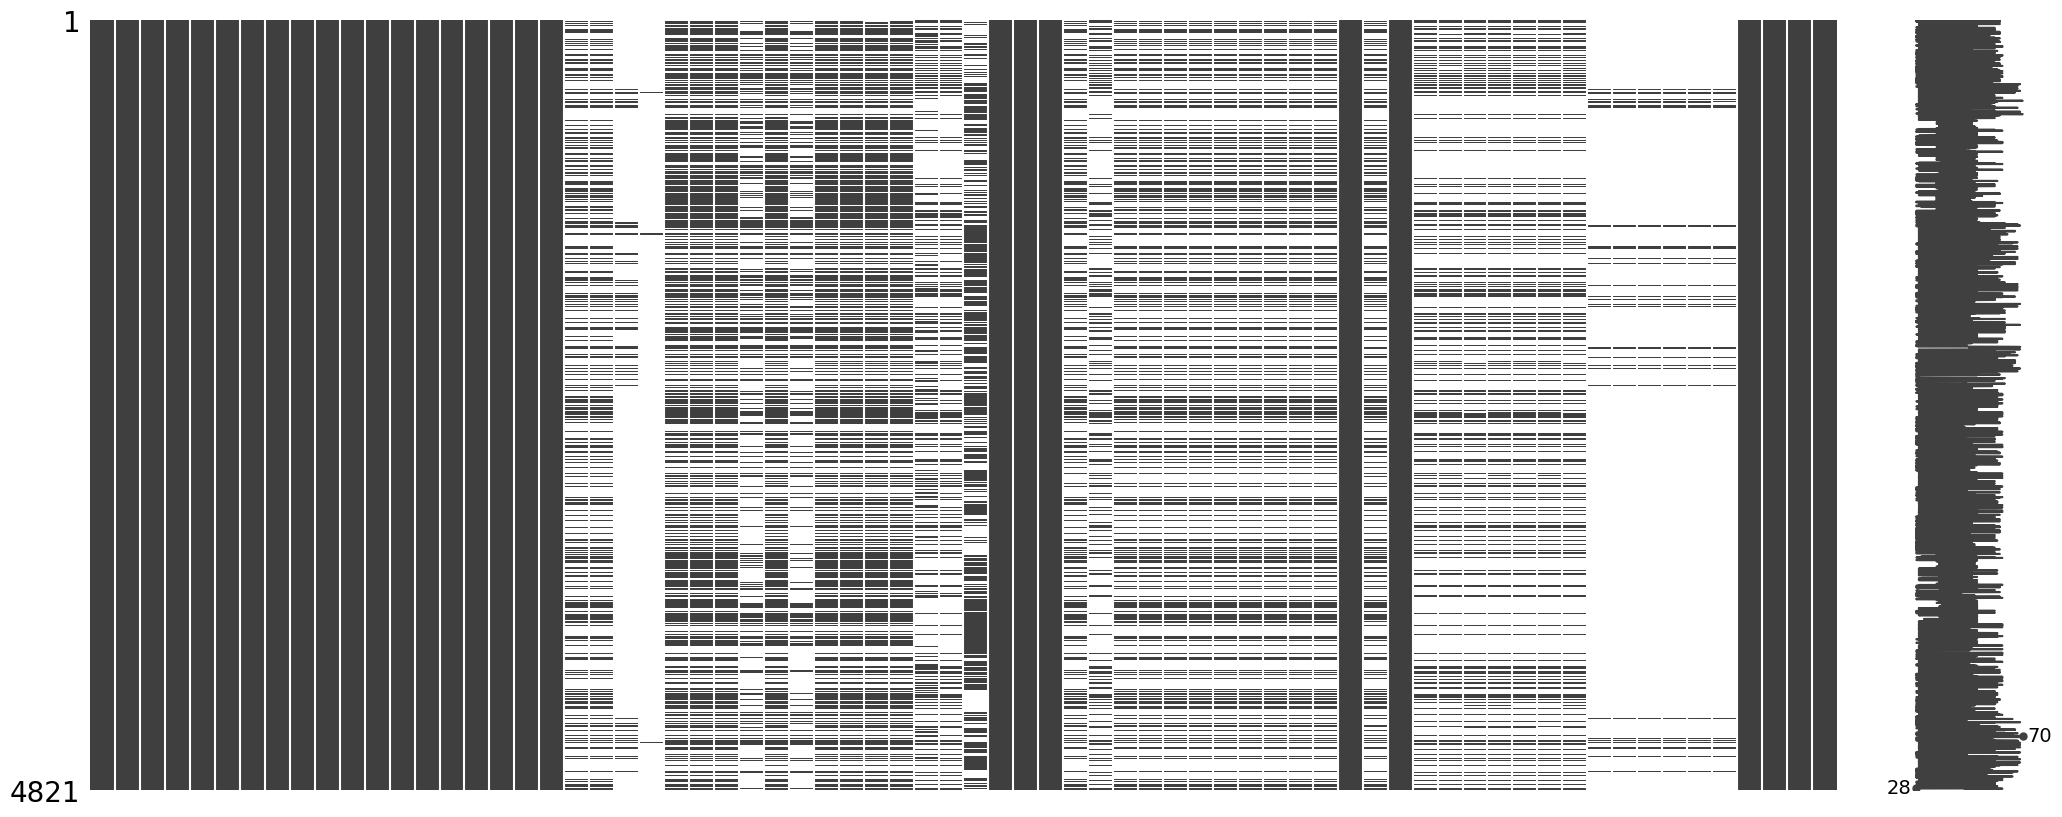

In [370]:
# Nesta pesquisa mexicana, os exames de sangue variam de acordo com o sexo e a faixa etária da população
# Convém analisar se serão necessárias medidas de higienização ou normalização dependendo das análises que serão feitas a seguir.
# A princípio, não se faz necessário

# Visualização matricial da nulidade do dataset
ms.matrix(dsExameSangueFinal)

In [371]:
# Verificando novamente os nulls no dataset
camposMissing = dsExameSangueFinal.isnull().sum()

# Imprime os campos com suas respectivas quantidades de linhas com valor Missing
pd.DataFrame({'campo':camposMissing.index, 'qtdNull':camposMissing.values})

,campo,qtdNull
0,id,0
1,id_base,0
2,hora_ini,0
3,data_ini,0
4,entidade,0
5,desc_ent,0
6,municipio,0
7,desc_mun,0
8,sexo,0
9,idade,0


###2.2.6 Dataset Final Exames de Sangue

In [372]:
# Detalha a estrutura do dataset, mostrando suas colunas, qtde de valores nulos e não nulos e tipo de dado.
pd.DataFrame({"coluna": dsExameSangueFinal.columns, "qtdNotNull": len(dsExameSangueFinal)-dsExameSangueFinal.isnull().sum().values, "qtdNull": dsExameSangueFinal.isnull().sum().values, "tipoDado": dsExameSangueFinal.dtypes.values})

,coluna,qtdNotNull,qtdNull,tipoDado
0,id,4821,0,object
1,id_base,4821,0,object
2,hora_ini,4821,0,object
3,data_ini,4821,0,object
4,entidade,4821,0,int64
5,desc_ent,4821,0,object
6,municipio,4821,0,int64
7,desc_mun,4821,0,object
8,sexo,4821,0,int64
9,idade,4821,0,int64


In [373]:
# Exibir Primeiras Linhas do Dataset
dsExameSangueFinal.head(10)

,id,id_base,hora_ini,data_ini,entidade,desc_ent,municipio,desc_mun,sexo,idade,data_nasc,selecionado_sangue_capilar,selecionado_sangue_venoso,selecionado_sangue_venoso_anemia,selecionado_sangue_figado_gorduroso,selecionado_sangue_venoso_micronutrientes_1a11anos,selecionado_sangue_venoso_micronutrientes_mulher_12a49anos,selecionado_sangue_venoso_micronutrientes,selecionado_sangue_venoso_vacinas_polio,hora_coleta_sangue,qtd_horas_jejum,ciente_doenca_figado,tratamento_doenca_figado,concentracao_hemoglobina,concentracao_hemoglobina_temperatura_ambiente,possivel_registrar_temperatura_ambiente,temperatura_ambiente,possivel_registrar_umidade_relativa,umidade_relativa,qtd_cubeta,data_abertura_cubetas,numero_hemocue,chave_coletor,resultado_coleta_amostra_venosa,hora_coleta_amostra_venosa,comentario,hora_fim,data_fim,amostra_soro,data_determinacao_ana_cron,data_determinacao_micronutrientes,acido_urico,albumina,colesterol_hdl,colesterol_ldl,colesterol_total,creatinina,glicose,insulina,triglicerideo,amostra_st,hemoglobina_glicosada,amostra_micro,ferritina,folato,homocisteina,proteina_c_reativa,receptor_transferrina,vitamina_b12,vitamina_d,sub_amostra_figado,transaminase_tgp,transaminase_tgo,bilirrubina,transferase_ggt,plaqueta,extrato_urbano_rural,ext_sel,upm,altitude
0,2023_01001001_02,2023_01001001,12:12:36,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,30071982,1,1,1,0,0,1,1,0,12:25,12.0,NaN,NaN,9,3.0,2.0,NaN,2.0,NaN,2109923.0,20230922.0,L628163,MQ645,1.0,12:19,NaN,12:36:28,05/12/2023,1,12/14/2023 0:00:00,12/13/2023 0:00:00,"4,8","3,3",36.0,66.0,114,",61",98.0,"28,2",107.0,1,"5,6",1,"2,3","6,1","10,1","1,1","63,2",205,"12,1",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
1,2023_01001001_04,2023_01001001,15:24:41,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,17,2112006,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:25:27,04/12/2023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
2,2023_01001002_01,2023_01001002,08:04:50,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,18031980,1,1,1,0,0,1,1,0,08:10,12.0,NaN,NaN,"13,1",3.0,1.0,9.0,1.0,99.0,2109923.0,20230922.0,L628163,MQ645,1.0,08:10,NaN,08:14:16,05/12/2023,1,12/14/2023 0:00:00,12/14/2023 0:00:00,"5,7","3,4",37.0,73.0,120,",75",114.0,"13,2",109.0,1,"6,1",1,"30,8",24,"7,5","1,2","14,9",975,"31,7",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
3,2023_01001002_04,2023_01001002,22:31:50,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,13,1042010,1,0,1,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22:30,NaN,22:32:54,04/12/2023,0,NaN,12/14/2023 0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,"10,6",32,"6,5",",02","15,4",290,"15,5",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
4,2023_01001008_03,2023_01001008,08:34:13,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,22012003,1,1,1,0,0,1,1,0,09:30,14.0,NaN,NaN,"16,4",3.0,1.0,9.0,1.0,95.0,2109923.0,20231122.0,L628256,MQ646,1.0,09:30,NaN,08:36:49,05/12/2023,1,12/14/2023 0:00:00,12/13/2023 0:00:00,"5,9","4,3",52.0,117.0,179,",57",76.0,"5,8",101.0,1,"5,1",1,"32,1","21,6","7,9",",46","13,5",193,"19,7",NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
5,2023_01001008_05,2023_01001008,08:36:51,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,16,30042007,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08:37:33,05/12/2023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1000,0100100013312,1878
6,2023_01001009_01,2023_01001009,09:21:05,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,56,18051967,1,1,1,0,0,0,0,0,09:00,12.0,NaN,NaN,"15,7",3.0,2.0,NaN,2.0,NaN,2109923.0,20230922.0,L628163,MQ645,NaN,NaN,NaN,09:22:57,05/12/2023,1,12/14/2023 0:00:00,NaN,"4,8","4,4",60.0,124.0,205,",75",84.0,"6,5",167.0,1,"5,1",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 2.3 Dataset Antropometria


### 2.3.1 Carga do Dataset

In [374]:
# URL do Dataset
url = "https://github.com/dbenev-com-br/mvp_analise_exploratoria_2024-09/raw/refs/heads/main/datasets/antropometria_HTA_4mar24.csv"

# Lê o arquivo do Dataset, dando skipinitialspace nos campos para transformar
# strings vazias em NaNs
dsAntropometria = pd.read_csv(url, delimiter=';', encoding='utf-8-sig', skipinitialspace=True)
dsAntropometria.columns = ['id','id_base','hora_ini_1','data_ini_1','hora_fim_1','data_fim_1','duracao_entrevista_1','resultado_entrevista_1','hora_ini_2','data_ini_2','hora_fim_2','data_fim_2','duracao_entrevista_2','resultado_entrevista_2','hora_ini_3','data_ini_3','hora_fim_3','data_fim_3','duracao_entrevista_3','resultado_entrevista_3','hora_ini_4','data_ini_4','hora_fim_4','data_fim_4','duracao_entrevista_4','resultado_entrevista_4','hora_ini','data_ini','localizado','entidade','desc_ent','municipio','desc_mun','sexo','anos_idade','meses_idade','data_nasc','nota01','peso_menor60anos_1','vestimenta_menor60anos_1','peso_menor60anos_resultado','nota02','altura_menor60anos_1','altura_menor60anos_resultado','estado_fisiologico_gestante_amamentacao_mulher_12a49anos','tempo_gestacao_mulher_12a49anos','nota03','circunferencia_cintura_20a59anos_1','circunferencia_cintura_20a59anos_resultado','peso_menor60anos_2','altura_menor60anos_2','circunferencia_cintura_20a59anos_2','nota04','perda_peso_3meses_maior60anos','tipo_amputacao_maior60anos','peso_maior60anos_1','vestimenta_maior60anos','peso_maior60anos_resultado','altura_em_pe_maior60anos_1','altura_maior60anos_resultado','altura_sentado_joelho_calcanhar_maior60anos_1','altura_sentado_joelho_calcanhar_maior60anos_resultado','circunferencia_panturrilha_maior60anos','circunferencia_panturrilha_maior60anos_resultado','circunferencia_cintura_maior60anos_1','circunferencia_cintura_maior60anos_resultado','peso_maior60anos_2','altura_em_pe_maior60anos_1','circunferencia_cintura_maior60anos_2','nota05','envergadura_peito_dedo_medio_maior60anos_amputado','envergadura_peito_dedo_medio_resultado_maior60anos_amputado','circunferencia_braco_maior60anos_amputado','circunferencia_braco_maior60anos_amputado_resultado','nota06','pressao_sistolica_maior20anos_1','pressao_diastolica_maior20anos_1','pressao_sistolica_maior20anos_2','pressao_diastolica_maior20anos_2','pressao_sistolica_maior20anos_3','pressao_diastolica_maior20anos_3','hora_pressao_maior20anos','braco_pressao_maior20anos','pressao_maior20anos_resultado','imc','reporte_imc','comentario','duracao_entrevista','hora_fim','data_fim','entrevista_completa','ponderador','extrato_urbano_rural','ext_sel','upm','regiao','t_ponde']

# Exibir Qtde de Linhas do Dataset
qtdLinhasDataset = dsAntropometria.shape[0]
md(f'####{qtdLinhasDataset=}')


####qtdLinhasDataset=3509

In [375]:
# Detalha a estrutura do dataset, mostrando suas colunas, qtde de valores nulos e não nulos e tipo de dado.
pd.DataFrame({"coluna": dsAntropometria.columns, "qtdNotNull": len(dsAntropometria)-dsAntropometria.isnull().sum().values, "qtdNull": dsAntropometria.isnull().sum().values, "tipoDado": dsAntropometria.dtypes.values})

,coluna,qtdNotNull,qtdNull,tipoDado
0,id,3509,0,object
1,id_base,3509,0,object
2,hora_ini_1,3509,0,object
3,data_ini_1,3509,0,object
4,hora_fim_1,3509,0,object
5,data_fim_1,3509,0,object
6,duracao_entrevista_1,3509,0,int64
7,resultado_entrevista_1,3509,0,int64
8,hora_ini_2,378,3131,object
9,data_ini_2,378,3131,object


In [376]:
# Exibir Primeiras Linhas do Dataset
dsAntropometria.head(10)

,id,id_base,hora_ini_1,data_ini_1,hora_fim_1,data_fim_1,duracao_entrevista_1,resultado_entrevista_1,hora_ini_2,data_ini_2,hora_fim_2,data_fim_2,duracao_entrevista_2,resultado_entrevista_2,hora_ini_3,data_ini_3,hora_fim_3,data_fim_3,duracao_entrevista_3,resultado_entrevista_3,hora_ini_4,data_ini_4,hora_fim_4,data_fim_4,duracao_entrevista_4,resultado_entrevista_4,hora_ini,data_ini,localizado,entidade,desc_ent,municipio,desc_mun,sexo,anos_idade,meses_idade,data_nasc,nota01,peso_menor60anos_1,vestimenta_menor60anos_1,peso_menor60anos_resultado,nota02,altura_menor60anos_1,altura_menor60anos_resultado,estado_fisiologico_gestante_amamentacao_mulher_12a49anos,tempo_gestacao_mulher_12a49anos,nota03,circunferencia_cintura_20a59anos_1,circunferencia_cintura_20a59anos_resultado,peso_menor60anos_2,altura_menor60anos_2,circunferencia_cintura_20a59anos_2,nota04,perda_peso_3meses_maior60anos,tipo_amputacao_maior60anos,peso_maior60anos_1,vestimenta_maior60anos,peso_maior60anos_resultado,altura_em_pe_maior60anos_1,altura_maior60anos_resultado,altura_sentado_joelho_calcanhar_maior60anos_1,altura_sentado_joelho_calcanhar_maior60anos_resultado,circunferencia_panturrilha_maior60anos,circunferencia_panturrilha_maior60anos_resultado,circunferencia_cintura_maior60anos_1,circunferencia_cintura_maior60anos_resultado,peso_maior60anos_2,altura_em_pe_maior60anos_1,circunferencia_cintura_maior60anos_2,nota05,envergadura_peito_dedo_medio_maior60anos_amputado,envergadura_peito_dedo_medio_resultado_maior60anos_amputado,circunferencia_braco_maior60anos_amputado,circunferencia_braco_maior60anos_amputado_resultado,nota06,pressao_sistolica_maior20anos_1,pressao_diastolica_maior20anos_1,pressao_sistolica_maior20anos_2,pressao_diastolica_maior20anos_2,pressao_sistolica_maior20anos_3,pressao_diastolica_maior20anos_3,hora_pressao_maior20anos,braco_pressao_maior20anos,pressao_maior20anos_resultado,imc,reporte_imc,comentario,duracao_entrevista,hora_fim,data_fim,entrevista_completa,ponderador,extrato_urbano_rural,ext_sel,upm,regiao,t_ponde
0,2023_01001001_01,2023_01001001,21:09:08,04/12/2023,21:22:44,04/12/2023,13,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,21:09:08,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,47,6,26041976,1.0,"79,05",2.0,1.0,1.0,"167,3",1.0,NaN,NaN,1.0,"99,3",1.0,"79,15","167,3","99,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,113,83,130,82,123,75,21:20,1,1,"28,24",1.0,NaN,13,21:22:44,04/12/2023,1,"20651,8701138747",3,1000,0100100013312,1,"28124,2071357436"
1,2023_01001001_02,2023_01001001,15:32:25,04/12/2023,15:43:58,04/12/2023,11,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,15:32:25,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,3,30071982,1.0,"114,15",2.0,1.0,1.0,"153,2",1.0,4.0,NaN,1.0,"222,2",2.0,"114,25","153,4","222,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,120,85,121,80,138,92,15:42,1,1,"48,64",1.0,NaN,11,15:43:58,04/12/2023,1,"59145,9550535005",3,1000,0100100013312,1,"70850,4706253506"
2,2023_01001002_01,2023_01001002,21:42:27,04/12/2023,22:13:42,04/12/2023,31,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,21:42:27,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,8,18031980,1.0,"95,3",2.0,1.0,1.0,"159,5",1.0,4.0,NaN,1.0,"99,3",1.0,"95,2","159,7","99,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,118,95,104,76,114,80,22:11,1,1,"37,46",1.0,NaN,31,22:13:42,04/12/2023,1,"29572,9775267502",3,1000,0100100013312,1,"35425,2353126753"
3,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,13:55:00,04/12/2023,6,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,13:33:38,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,49,4,16071974,1.0,"68,15",2.0,1.0,1.0,"162,4",1.0,NaN,NaN,1.0,"92,4",1.0,68,"162,4","92,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.3.2 Análise e Tratamento de Missings

In [377]:
# Verificando nulls no dataset
camposMissing = dsAntropometria.isnull().sum()

# Imprime os campos com suas respectivas quantidades de linhas com valor Missing
pd.DataFrame({'campo':camposMissing.index, 'qtdNull':camposMissing.values})

,campo,qtdNull
0,id,0
1,id_base,0
2,hora_ini_1,0
3,data_ini_1,0
4,hora_fim_1,0
5,data_fim_1,0
6,duracao_entrevista_1,0
7,resultado_entrevista_1,0
8,hora_ini_2,3131
9,data_ini_2,3131


In [378]:
# Será feito o descarte dos campos que estão missing em todas as linhas

# O dataset será copiado para uso nos proximos passos

# Recuperando os nomes das colunas
col = list(dsAntropometria.columns)

# Novo dataset que irá inicialmente conter todas as colunas do dataset original
dsAntropometriaFinal = dsAntropometria[col[:]]

# Filtra os campos 100% missing para drop em seguida
camposTodosMissing = camposMissing[camposMissing == qtdLinhasDataset]

# Imprime campos com 100% de valores missing
pd.DataFrame({'campo':camposTodosMissing.index, 'qtdNull':camposTodosMissing.values}).style.hide(axis="index")

campo,qtdNull


In [379]:
# Remove as colunas que não interessam ao proposito do projeto (Ids não
# usados, datas e horas de inicio e fim das entrevistas, duração das
# entrevistas, notas diversas)
qtdCamposDeletados = len(camposTodosMissing.index)

if (qtdCamposDeletados > 0):
  dsAntropometriaFinal.drop(camposTodosMissing.index, axis=1, inplace= True)

print(f'{qtdCamposDeletados=}')

# Mostra o dataset sem as colunas removidas
dsAntropometriaFinal.head(10)

qtdCamposDeletados=0


,id,id_base,hora_ini_1,data_ini_1,hora_fim_1,data_fim_1,duracao_entrevista_1,resultado_entrevista_1,hora_ini_2,data_ini_2,hora_fim_2,data_fim_2,duracao_entrevista_2,resultado_entrevista_2,hora_ini_3,data_ini_3,hora_fim_3,data_fim_3,duracao_entrevista_3,resultado_entrevista_3,hora_ini_4,data_ini_4,hora_fim_4,data_fim_4,duracao_entrevista_4,resultado_entrevista_4,hora_ini,data_ini,localizado,entidade,desc_ent,municipio,desc_mun,sexo,anos_idade,meses_idade,data_nasc,nota01,peso_menor60anos_1,vestimenta_menor60anos_1,peso_menor60anos_resultado,nota02,altura_menor60anos_1,altura_menor60anos_resultado,estado_fisiologico_gestante_amamentacao_mulher_12a49anos,tempo_gestacao_mulher_12a49anos,nota03,circunferencia_cintura_20a59anos_1,circunferencia_cintura_20a59anos_resultado,peso_menor60anos_2,altura_menor60anos_2,circunferencia_cintura_20a59anos_2,nota04,perda_peso_3meses_maior60anos,tipo_amputacao_maior60anos,peso_maior60anos_1,vestimenta_maior60anos,peso_maior60anos_resultado,altura_em_pe_maior60anos_1,altura_em_pe_maior60anos_1,altura_maior60anos_resultado,altura_sentado_joelho_calcanhar_maior60anos_1,altura_sentado_joelho_calcanhar_maior60anos_resultado,circunferencia_panturrilha_maior60anos,circunferencia_panturrilha_maior60anos_resultado,circunferencia_cintura_maior60anos_1,circunferencia_cintura_maior60anos_resultado,peso_maior60anos_2,altura_em_pe_maior60anos_1,altura_em_pe_maior60anos_1,circunferencia_cintura_maior60anos_2,nota05,envergadura_peito_dedo_medio_maior60anos_amputado,envergadura_peito_dedo_medio_resultado_maior60anos_amputado,circunferencia_braco_maior60anos_amputado,circunferencia_braco_maior60anos_amputado_resultado,nota06,pressao_sistolica_maior20anos_1,pressao_diastolica_maior20anos_1,pressao_sistolica_maior20anos_2,pressao_diastolica_maior20anos_2,pressao_sistolica_maior20anos_3,pressao_diastolica_maior20anos_3,hora_pressao_maior20anos,braco_pressao_maior20anos,pressao_maior20anos_resultado,imc,reporte_imc,comentario,duracao_entrevista,hora_fim,data_fim,entrevista_completa,ponderador,extrato_urbano_rural,ext_sel,upm,regiao,t_ponde
0,2023_01001001_01,2023_01001001,21:09:08,04/12/2023,21:22:44,04/12/2023,13,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,21:09:08,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,47,6,26041976,1.0,"79,05",2.0,1.0,1.0,"167,3",1.0,NaN,NaN,1.0,"99,3",1.0,"79,15","167,3","99,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,113,83,130,82,123,75,21:20,1,1,"28,24",1.0,NaN,13,21:22:44,04/12/2023,1,"20651,8701138747",3,1000,0100100013312,1,"28124,2071357436"
1,2023_01001001_02,2023_01001001,15:32:25,04/12/2023,15:43:58,04/12/2023,11,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,15:32:25,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,3,30071982,1.0,"114,15",2.0,1.0,1.0,"153,2",1.0,4.0,NaN,1.0,"222,2",2.0,"114,25","153,4","222,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,120,85,121,80,138,92,15:42,1,1,"48,64",1.0,NaN,11,15:43:58,04/12/2023,1,"59145,9550535005",3,1000,0100100013312,1,"70850,4706253506"
2,2023_01001002_01,2023_01001002,21:42:27,04/12/2023,22:13:42,04/12/2023,31,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,21:42:27,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,8,18031980,1.0,"95,3",2.0,1.0,1.0,"159,5",1.0,4.0,NaN,1.0,"99,3",1.0,"95,2","159,7","99,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,118,95,104,76,114,80,22:11,1,1,"37,46",1.0,NaN,31,22:13:42,04/12/2023,1,"29572,9775267502",3,1000,0100100013312,1,"35425,2353126753"
3,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,13:55:00,04/12/2023,6,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,13:33:38,04/12/2023,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,49,4,16071974,1.0,"68,15",2.0,1.0,1.0,"162,4",1.0,NaN,NaN,1.0,"92,4",1.0,68,"162,4","92,6",NaN,Na

### 2.3.4 Remoção dos campos inúteis para o projeto

In [380]:
# Remove as colunas que não interessam ao proposito do projeto (Ids não
# usados, datas e horas de inicio e fim das entrevistas, duração das
# entrevistas, notas diversas)
dsAntropometriaFinal.drop(['id_base','hora_ini_1','data_ini_1','hora_fim_1','data_fim_1','duracao_entrevista_1','resultado_entrevista_1','hora_ini_2','data_ini_2','hora_fim_2','data_fim_2','duracao_entrevista_2','resultado_entrevista_2','hora_ini_3','data_ini_3','hora_fim_3','data_fim_3','duracao_entrevista_3','resultado_entrevista_3','hora_ini_4','data_ini_4','hora_fim_4','data_fim_4','duracao_entrevista_4','resultado_entrevista_4','nota01','nota02','nota03','nota04','nota05','nota06','duracao_entrevista','entrevista_completa','ponderador','t_ponde','localizado','vestimenta_menor60anos_1','peso_menor60anos_resultado','altura_menor60anos_resultado','perda_peso_3meses_maior60anos','tipo_amputacao_maior60anos','vestimenta_maior60anos','peso_maior60anos_resultado','altura_em_pe_maior60anos_1','altura_maior60anos_resultado','altura_sentado_joelho_calcanhar_maior60anos_1','altura_sentado_joelho_calcanhar_maior60anos_resultado','circunferencia_panturrilha_maior60anos','envergadura_peito_dedo_medio_maior60anos_amputado','envergadura_peito_dedo_medio_resultado_maior60anos_amputado','circunferencia_braco_maior60anos_amputado','circunferencia_braco_maior60anos_amputado_resultado','comentario'], axis=1, inplace= True)

# Mostra o dataset sem as colunas removidas
dsAntropometriaFinal.head(10)

,id,hora_ini,data_ini,entidade,desc_ent,municipio,desc_mun,sexo,anos_idade,meses_idade,data_nasc,peso_menor60anos_1,altura_menor60anos_1,estado_fisiologico_gestante_amamentacao_mulher_12a49anos,tempo_gestacao_mulher_12a49anos,circunferencia_cintura_20a59anos_1,circunferencia_cintura_20a59anos_resultado,peso_menor60anos_2,altura_menor60anos_2,circunferencia_cintura_20a59anos_2,peso_maior60anos_1,circunferencia_panturrilha_maior60anos_resultado,circunferencia_cintura_maior60anos_1,circunferencia_cintura_maior60anos_resultado,peso_maior60anos_2,circunferencia_cintura_maior60anos_2,pressao_sistolica_maior20anos_1,pressao_diastolica_maior20anos_1,pressao_sistolica_maior20anos_2,pressao_diastolica_maior20anos_2,pressao_sistolica_maior20anos_3,pressao_diastolica_maior20anos_3,hora_pressao_maior20anos,braco_pressao_maior20anos,pressao_maior20anos_resultado,imc,reporte_imc,hora_fim,data_fim,extrato_urbano_rural,ext_sel,upm,regiao
0,2023_01001001_01,21:09:08,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,47,6,26041976,"79,05","167,3",NaN,NaN,"99,3",1.0,"79,15","167,3","99,5",NaN,NaN,NaN,NaN,NaN,NaN,113,83,130,82,123,75,21:20,1,1,"28,24",1.0,21:22:44,04/12/2023,3,1000,0100100013312,1
1,2023_01001001_02,15:32:25,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,3,30071982,"114,15","153,2",4.0,NaN,"222,2",2.0,"114,25","153,4","222,2",NaN,NaN,NaN,NaN,NaN,NaN,120,85,121,80,138,92,15:42,1,1,"48,64",1.0,15:43:58,04/12/2023,3,1000,0100100013312,1
2,2023_01001002_01,21:42:27,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,8,18031980,"95,3","159,5",4.0,NaN,"99,3",1.0,"95,2","159,7","99,3",NaN,NaN,NaN,NaN,NaN,NaN,118,95,104,76,114,80,22:11,1,1,"37,46",1.0,22:13:42,04/12/2023,3,1000,0100100013312,1
3,2023_01001003_01,13:33:38,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,49,4,16071974,"68,15","162,4",NaN,NaN,"92,4",1.0,68,"162,4","92,6",NaN,NaN,NaN,NaN,NaN,NaN,118,72,116,70,118,68,13:50,1,1,"25,84",1.0,13:55:00,04/12/2023,3,1000,0100100013312,1
4,2023_01001003_04,13:38:01,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,6,10052003,"56,45","155,5",4.0,NaN,"79,5",1.0,"56,2","155,7","79,5",NaN,NaN,NaN,NaN,NaN,NaN,93,61,90,66,95,66,14:25,1,1,"23,35",1.0,14:26:03,04/12/2023,3,1000,0100100013312,1
5,2023_01001008_03,17:08:16,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,9,22012003,"62,6","156,2",4.0,NaN,"83,2",1.0,"62,6","156,5","82,2",NaN,NaN,NaN,NaN,NaN,NaN,103,67,96,63,97,63,18:49,1,1,"25,66",1.0,17:46:51,04/12/2023,3,1000,0100100013312,1
6,2023_01001009_02,15:28:48,06/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,29,10,3011994,"81,9","157,8",4.0,NaN,"111,3",1.0,"81,9","157,8","111,3",NaN,NaN,NaN,NaN,NaN,NaN,99,97,94,69,103,80,15:33,1,1,"32,89",1.0,15:34:16,06/12/2023,3,1000,0100100013312,1
7,2023_01001010_02,18:53:09,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,49,4,16071974,"50,95","147,6",4.0,NaN,"84,5",1.0,51,"147,8","84,6",NaN,NaN,NaN,NaN,NaN,NaN,106,73,114,78,107,66,19:00,1,1,"23,39",1.0,19:06:14,04/12/2023,3,1000,0100100013312,1
8,2023_01001010_04,19:06:17,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,6,7052003,"58,15","157,4",4.0,NaN,"80,1",1.0,"58,1","157,3","80,1",NaN,NaN,NaN,NaN,NaN,NaN,83,55,84,57,84,50,19:20,1,1,"23,47",1.0,19:25:28,04/12/2023,3,1000,0100100013312,1
9,2023_01001016_03,16:53:51,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,21,8,1032002,"63,6","160,8",4.0,NaN,"83,2",1.0,"63,55",161,"83,1",NaN,NaN,NaN,NaN,NaN,NaN,108,63,106,65,99,63,18:09,1,1,"24,6",1.0,17:04:46,05/12/2023,3,1000,0100100013312,1


### 2.3.5 Verificação Nulidade das Colunas

<Axes: >

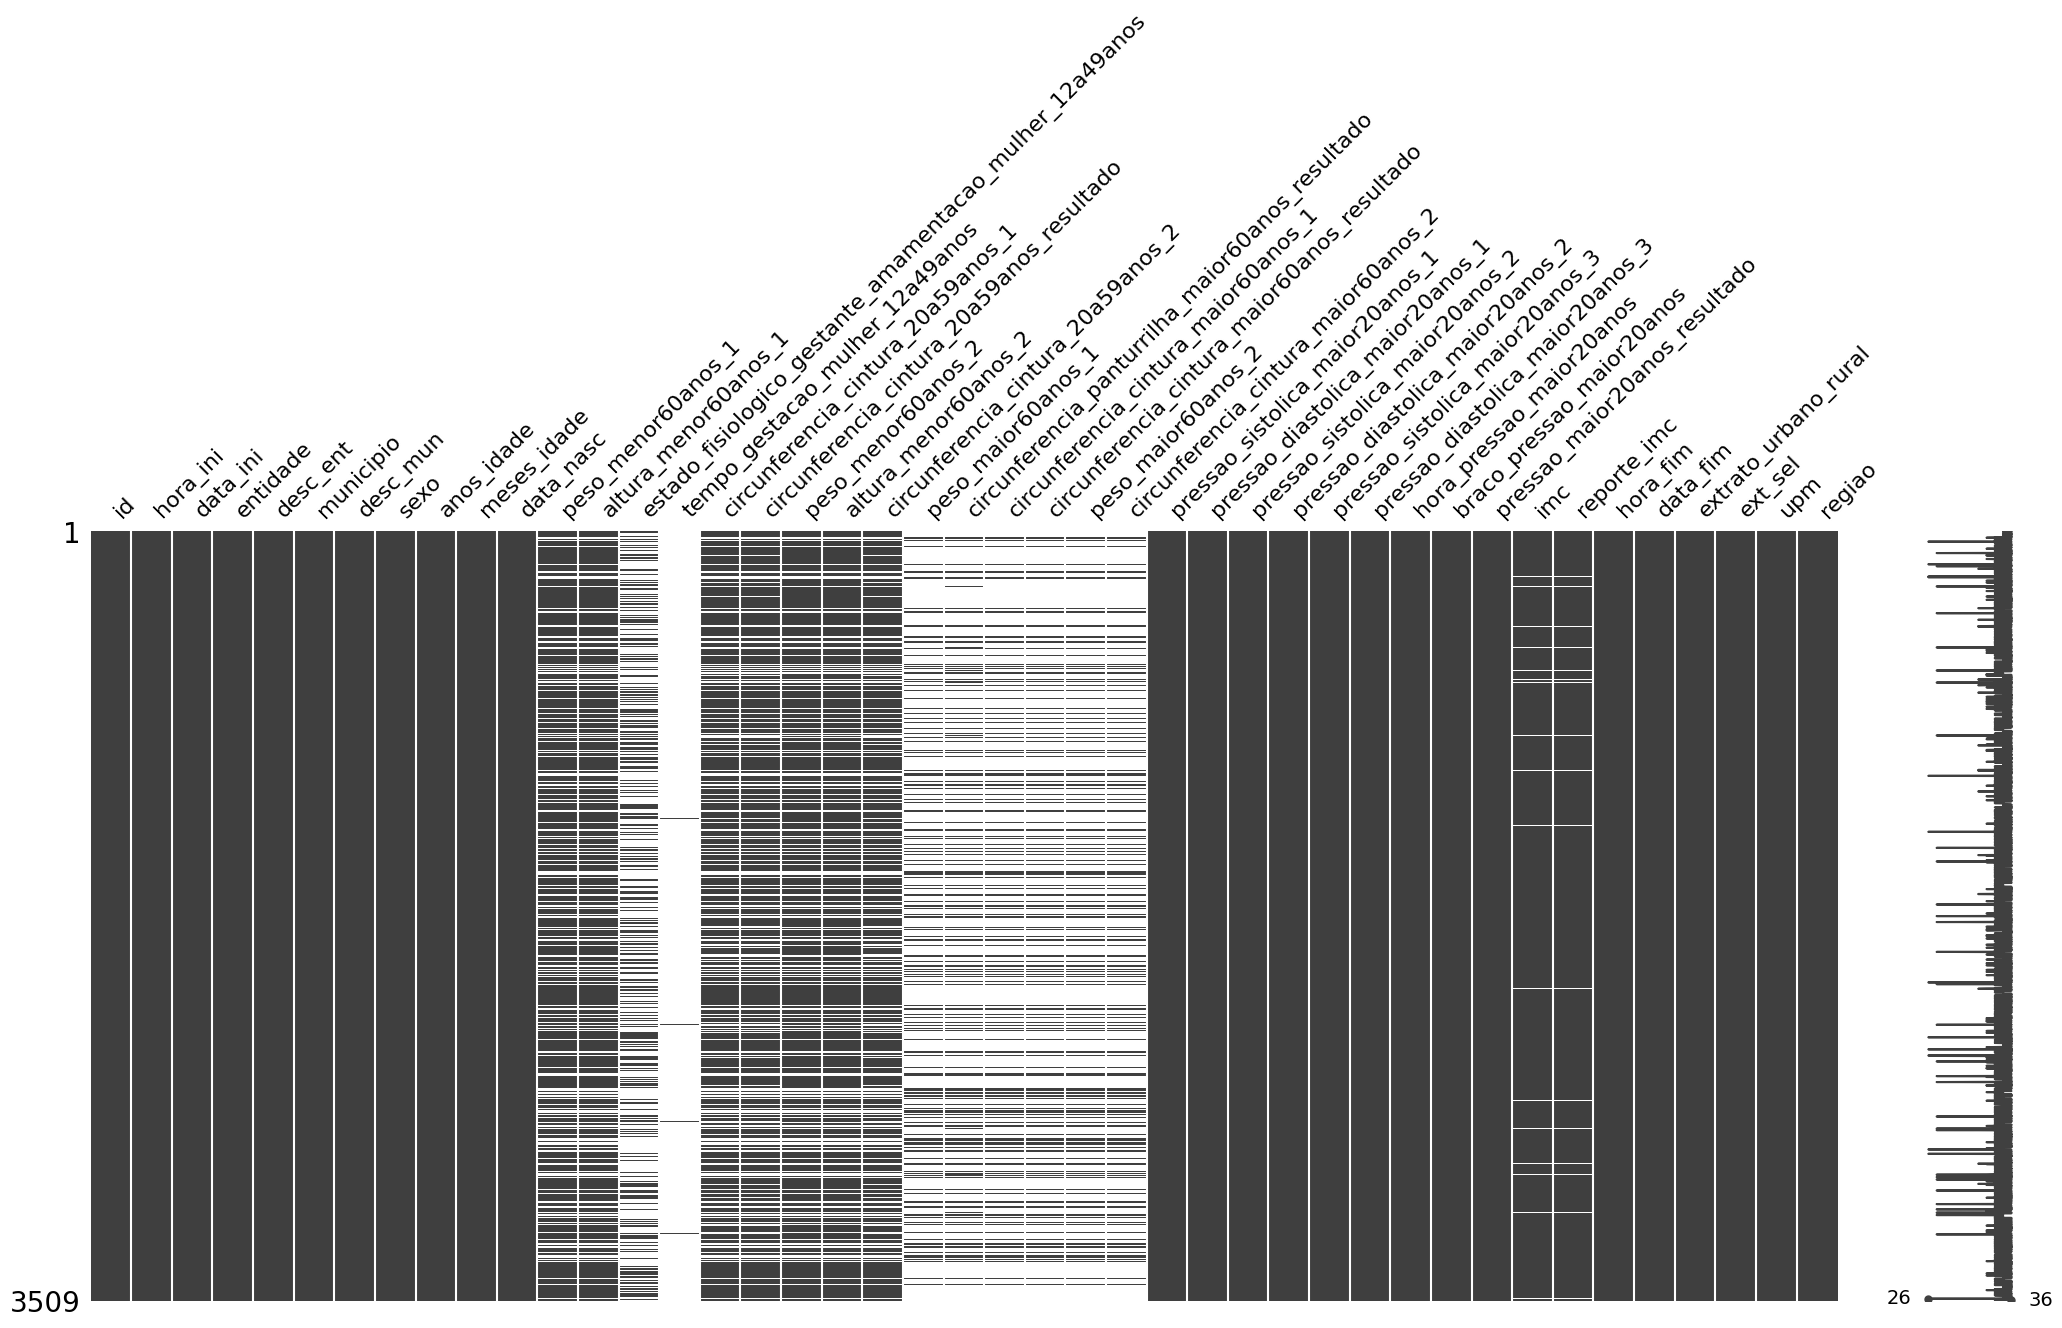

In [381]:
# Nesta pesquisa mexicana, a coleta dos dados antropométricos variam de acordo
# com o sexo e a faixa etária da população.
# Convém analisar se serão necessárias medidas de higienização ou
# normalização dependendo das análises que serão feitas a seguir.
# A princípio, não se faz necessário.

# Visualização matricial da nulidade do dataset
ms.matrix(dsAntropometriaFinal)

In [382]:
# Verificando novamente os nulls no dataset
camposMissing = dsAntropometriaFinal.isnull().sum()

# Imprime os campos com suas respectivas quantidades de linhas com valor Missing
pd.DataFrame({'campo':camposMissing.index, 'qtdNull':camposMissing.values})

,campo,qtdNull
0,id,0
1,hora_ini,0
2,data_ini,0
3,entidade,0
4,desc_ent,0
5,municipio,0
6,desc_mun,0
7,sexo,0
8,anos_idade,0
9,meses_idade,0


###2.3.6 Dataset Final Antropometria e Pressão Arterial

---





In [383]:
# Detalha a estrutura do dataset, mostrando suas colunas, qtde de valores nulos e não nulos e tipo de dado.
pd.DataFrame({"coluna": dsAntropometriaFinal.columns, "qtdNotNull": len(dsAntropometriaFinal)-dsAntropometriaFinal.isnull().sum().values, "qtdNull": dsAntropometriaFinal.isnull().sum().values, "tipoDado": dsAntropometriaFinal.dtypes.values})

,coluna,qtdNotNull,qtdNull,tipoDado
0,id,3509,0,object
1,hora_ini,3509,0,object
2,data_ini,3509,0,object
3,entidade,3509,0,int64
4,desc_ent,3509,0,object
5,municipio,3509,0,int64
6,desc_mun,3509,0,object
7,sexo,3509,0,int64
8,anos_idade,3509,0,int64
9,meses_idade,3509,0,int64


In [384]:
# Mostra o dataset final
dsAntropometriaFinal.head(10)

,id,hora_ini,data_ini,entidade,desc_ent,municipio,desc_mun,sexo,anos_idade,meses_idade,data_nasc,peso_menor60anos_1,altura_menor60anos_1,estado_fisiologico_gestante_amamentacao_mulher_12a49anos,tempo_gestacao_mulher_12a49anos,circunferencia_cintura_20a59anos_1,circunferencia_cintura_20a59anos_resultado,peso_menor60anos_2,altura_menor60anos_2,circunferencia_cintura_20a59anos_2,peso_maior60anos_1,circunferencia_panturrilha_maior60anos_resultado,circunferencia_cintura_maior60anos_1,circunferencia_cintura_maior60anos_resultado,peso_maior60anos_2,circunferencia_cintura_maior60anos_2,pressao_sistolica_maior20anos_1,pressao_diastolica_maior20anos_1,pressao_sistolica_maior20anos_2,pressao_diastolica_maior20anos_2,pressao_sistolica_maior20anos_3,pressao_diastolica_maior20anos_3,hora_pressao_maior20anos,braco_pressao_maior20anos,pressao_maior20anos_resultado,imc,reporte_imc,hora_fim,data_fim,extrato_urbano_rural,ext_sel,upm,regiao
0,2023_01001001_01,21:09:08,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,47,6,26041976,"79,05","167,3",NaN,NaN,"99,3",1.0,"79,15","167,3","99,5",NaN,NaN,NaN,NaN,NaN,NaN,113,83,130,82,123,75,21:20,1,1,"28,24",1.0,21:22:44,04/12/2023,3,1000,0100100013312,1
1,2023_01001001_02,15:32:25,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,41,3,30071982,"114,15","153,2",4.0,NaN,"222,2",2.0,"114,25","153,4","222,2",NaN,NaN,NaN,NaN,NaN,NaN,120,85,121,80,138,92,15:42,1,1,"48,64",1.0,15:43:58,04/12/2023,3,1000,0100100013312,1
2,2023_01001002_01,21:42:27,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,43,8,18031980,"95,3","159,5",4.0,NaN,"99,3",1.0,"95,2","159,7","99,3",NaN,NaN,NaN,NaN,NaN,NaN,118,95,104,76,114,80,22:11,1,1,"37,46",1.0,22:13:42,04/12/2023,3,1000,0100100013312,1
3,2023_01001003_01,13:33:38,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,49,4,16071974,"68,15","162,4",NaN,NaN,"92,4",1.0,68,"162,4","92,6",NaN,NaN,NaN,NaN,NaN,NaN,118,72,116,70,118,68,13:50,1,1,"25,84",1.0,13:55:00,04/12/2023,3,1000,0100100013312,1
4,2023_01001003_04,13:38:01,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,6,10052003,"56,45","155,5",4.0,NaN,"79,5",1.0,"56,2","155,7","79,5",NaN,NaN,NaN,NaN,NaN,NaN,93,61,90,66,95,66,14:25,1,1,"23,35",1.0,14:26:03,04/12/2023,3,1000,0100100013312,1
5,2023_01001008_03,17:08:16,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,9,22012003,"62,6","156,2",4.0,NaN,"83,2",1.0,"62,6","156,5","82,2",NaN,NaN,NaN,NaN,NaN,NaN,103,67,96,63,97,63,18:49,1,1,"25,66",1.0,17:46:51,04/12/2023,3,1000,0100100013312,1
6,2023_01001009_02,15:28:48,06/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,29,10,3011994,"81,9","157,8",4.0,NaN,"111,3",1.0,"81,9","157,8","111,3",NaN,NaN,NaN,NaN,NaN,NaN,99,97,94,69,103,80,15:33,1,1,"32,89",1.0,15:34:16,06/12/2023,3,1000,0100100013312,1
7,2023_01001010_02,18:53:09,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,49,4,16071974,"50,95","147,6",4.0,NaN,"84,5",1.0,51,"147,8","84,6",NaN,NaN,NaN,NaN,NaN,NaN,106,73,114,78,107,66,19:00,1,1,"23,39",1.0,19:06:14,04/12/2023,3,1000,0100100013312,1
8,2023_01001010_04,19:06:17,04/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,20,6,7052003,"58,15","157,4",4.0,NaN,"80,1",1.0,"58,1","157,3","80,1",NaN,NaN,NaN,NaN,NaN,NaN,83,55,84,57,84,50,19:20,1,1,"23,47",1.0,19:25:28,04/12/2023,3,1000,0100100013312,1
9,2023_01001016_03,16:53:51,05/12/2023,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,21,8,1032002,"63,6","160,8",4.0,NaN,"83,2",1.0,"63,55",161,"83,1",NaN,NaN,NaN,NaN,NaN,NaN,108,63,106,65,99,63,18:09,1,1,"24,6",1.0,17:04:46,05/12/2023,3,1000,0100100013312,1
